<a href="https://colab.research.google.com/github/eeuunnjjiii/Meal-kit-Recommendation/blob/main/Additional_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib as mpl
mpl.rc('axes',unicode_minus=False)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns

In [2]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
NanumGothic Eco


# 추가 수집한 데이터 전처리

In [3]:
fresh = pd.read_csv('fresheasy_자사몰.csv', index_col=0)
fresh_emart = pd.read_csv('fresheasy_emartmall.csv', index_col=0)
cookit = pd.read_csv('cookit.csv', index_col=0)
fresh.head()

,title,price,thumb_image,ingre_image,total_review,total_rate,reviews,rates
0,풍원장 가자미 미역국,6900,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/goo...,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/edi...,NaN,0.0,0,0
1,백년가게 싱글벙글 직화 불막창세트,9900,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/goo...,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/edi...,NaN,0.0,0,0
2,백년가게 싱글벙글 직화 막창세트,9900,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/goo...,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/edi...,NaN,0.0,0,0
3,프리미엄 토마호크 스테이크 세트,90300,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/goo...,set,NaN,0.0,0,0
4,프리미엄 양갈비 파인다이닝 세트,59700,https://sjnfzdfjrjgl1655541.cdn.ntruss.com/goo...,set,1.0,5.0,['결혼기념일 요즘 어디 나가기는 힘들고 집에서 잘해먹자 하고 주문했는데 홈스토랑 ...,['5']


In [4]:
review = pd.read_csv('by_review.csv', index_col=0).dropna()
review.head()

,company,title,rates,reviews,data
15,프레시지,2마리가 들어간 시래기 고등어조림,"['5', '5', '2']","['맛있어요 조리 시 생선냄새가 강해 환기 잘하면서 조리해야됩니다', '양념이 너무...",emartmall
17,프레시지,2마리가 들어간 시래기 고등어조림,"['3', '5', '5', '5', '5', '5', '5', '5', '5', ...",['집에서 점점 생선요리 안해먹게 되는 것 같아요. 그런면에서 편리하고 한번 먹을 ...,naver
31,썬더버드,간편한 무설탕 제육볶음,[],[],emartmall
34,매드포갈릭,갈릭 스테이크,['5'],['매드포갈릭하면 갈릭스테이크죠 집에서도 맛있게 먹을수 있어서 너무 좋아요'],emartmall
36,프레시지,갈릭 시즈닝 스테이크,"['5', '3', '5', '5', '5', '5', '5', '5', '5', ...","['선택: 갈릭 시즈닝 스테이크 1+1평소 이마트 새벽배송', '배달은 주말포함 4...",naver


In [5]:
# 불용어, 특수문자 제거 후 토큰화 하는 함수
def text_stem(text,stopwords, okt):
    import re
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = okt.pos(txt, stem=True)
    clean_words=[]
    for word in token:
      if word[0] not in stopwords and word[1] in ['Noun', 'Adjective']:
        clean_words.append(word[0])
        
    return clean_words

In [6]:
# '한국어불용어100'으로 불용어 지정
stop = pd.read_csv('stopwords.txt', sep='\t', header=None)
stopwords = stop[0].to_list()
print(stopwords)

['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [7]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 51.3 MB/s 
     |████████████████████████████████| 448 kB 22.9 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [8]:
from konlpy.tag import Okt  
okt=Okt()

In [9]:
def return_review(df):
  ls = df.reviews.to_list()
  review_token=[]
  for i in ls:
    review_token.append(text_stem(i, stopwords, okt))

  #list > str
  re_token = []
  for i in review_token:
    re_token.append(','.join(i))

  df['review_token'] = re_token
  
  return df

In [10]:
fresh = return_review(fresh)
fresh_emart = return_review(fresh_emart)
cookit = return_review(cookit)
review = return_review(review)

In [11]:
fresh['company'] = '프레시지'
fresh['data'] = 'fresheasy'
cookit['company'] = '쿡킷'
cookit['data'] = 'cookit'

fresh_ = fresh[['company', 'title', 'review_token', 'data']]
cookit_ = cookit[['company', 'title', 'review_token', 'data']]
review_ = review[['company', 'title', 'review_token', 'data']]

In [12]:
df = pd.concat([review_, fresh_], axis=0)
df = pd.concat([df, cookit_], axis=0)
print(df.shape)

(1259, 4)


# EDA

In [13]:
site = pd.read_csv('by_site.csv', index_col=0)
print(site.shape)
site.head()

(2014, 7)


,company,title,price,total_review,total_rate,data,site
0,프레시지,고추장 알낙새,19900,2,4.0,fresheasy,https://fresheasy.co.kr/goods/view?no=839
1,프레시지,기름 소떡,9900,5,5.0,fresheasy,https://fresheasy.co.kr/goods/view?no=758
2,프레시지,도담냄비+닭한마리 칼국수+부추꼬막장,76500,0,0.0,fresheasy,https://fresheasy.co.kr/goods/view?no=858
3,프레시지,들기름막국수와 수육,12900,7,4.9,fresheasy,https://fresheasy.co.kr/goods/view?no=838
4,프레시지,부르스게타 플래터,14900,3,5.0,fresheasy,https://fresheasy.co.kr/goods/view?no=760


In [14]:
# 회사별
main = site['company'].value_counts()[:16]

In [15]:
# 밀키트 10개 이하 업체 : 기타로 분류
company_etc=[]
for i in site['company'].to_list():
  if i in main.index.to_list():
    company_etc.append(i)
  else:
    company_etc.append('기타')
site['company_ls'] = company_etc

# 프레시지, 쿡킷, 피코크 비교

## 재료 비교

In [16]:
item = pd.read_csv('by_item.csv', index_col=0)
item.head()

,company,title,site,image,ingre_image,ingre_text,ingre_text_tmp,text,ingredients
0,프레시밀,미트 파스타,http://emart.ssg.com/item/itemView.ssg?itemId=...,http://item.ssgcdn.com/60/16/49/item/100003749...,http://ai.esmplus.com/gded/f/r/20210518/16/162...,NaN,"\n\n0모\n\n미트 파스타 밀키트\n\n떠\n\n파스타면 1609, 마늘, 미...","0모미트파스타밀키트떠파스타면1609,마늘,미트파스타소스16092개,양파,재료정보올리...","스파게티, 마늘, 미트파스타 소스, 양파, 올리브오일, 갈릭치즈 파우더"
1,프레시밀,조림감자,http://emart.ssg.com/item/itemView.ssg?itemId=...,http://item.ssgcdn.com/58/06/87/item/100005287...,http://ai.esmplus.com/gded/f/r/20210518/17/162...,NaN,\n\n부\n쿠\n님\n앙\n응\n요\n부\n고\n위\n쁜\n>\n더\n응\n이\...,부쿠님앙응요부고위쁜더응이더떠초떠본상품에이상이있을경우공정거래위원회고시에의거보상해드립니...,"알감자, 참깨, 감자조림 소스"
2,프레시밀,크림카레,http://emart.ssg.com/item/itemView.ssg?itemId=...,http://item.ssgcdn.com/51/48/88/item/100005488...,http://ai.esmplus.com/gded/f/r/20210518/17/162...,NaN,"\n\n품명 크림 카레 밀키트\n\n돼지고기 전지 1009, 당근 172개, 감자...","품명크림카레밀키트돼지고기전지1009,당근172개,감자1개,양파1개,크림카레가루809...","돼지고기, 양파, 당근, 크림카레 가루, 감자, 애호박"
3,프레시밀,닭볶음탕,http://emart.ssg.com/item/itemView.ssg?itemId=...,http://item.ssgcdn.com/32/84/33/item/100005233...,http://ai.esmplus.com/gded/f/r/20210518/17/162...,NaN,\n\n제품명\n\n프리시밀닭북음당양념 |4폼\n\n형소스\n\n풀옥보보 |201...,제품명프리시밀닭북음당양념|4폼형소스풀옥보보|20190450429-9바용량|10002...,"감자, 대파, 양파, 쌀떡, 당근, 닭볶음탕 양념, 고구마, 청고추, 홍고추"
4,프레시밀,바지락 된장찌개,http://emart.ssg.com/item/itemView.ssg?itemId=...,http://item.ssgcdn.com/35/61/65/item/100004365...,http://ai.esmplus.com/gded/f/r/20210518/17/162...,NaN,"\n\n바지락 된장찌개 밑키트\n\n양파 1개, 감자 1개, 청양고추, 대파, 된...","바지락된장찌개밑키트양파1개,감자1개,청양고추,대파,된장찌개양념1009,두부1809,...","양파, 된장찌개 양념, 감자, 두부, 청양고추, 애호박, 대파, 바지락"


In [17]:
# 프레시지
from collections import Counter
item_fresh = item[item.company == '프레시지'].dropna()
ls = ''.join(item_fresh.ingredients.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

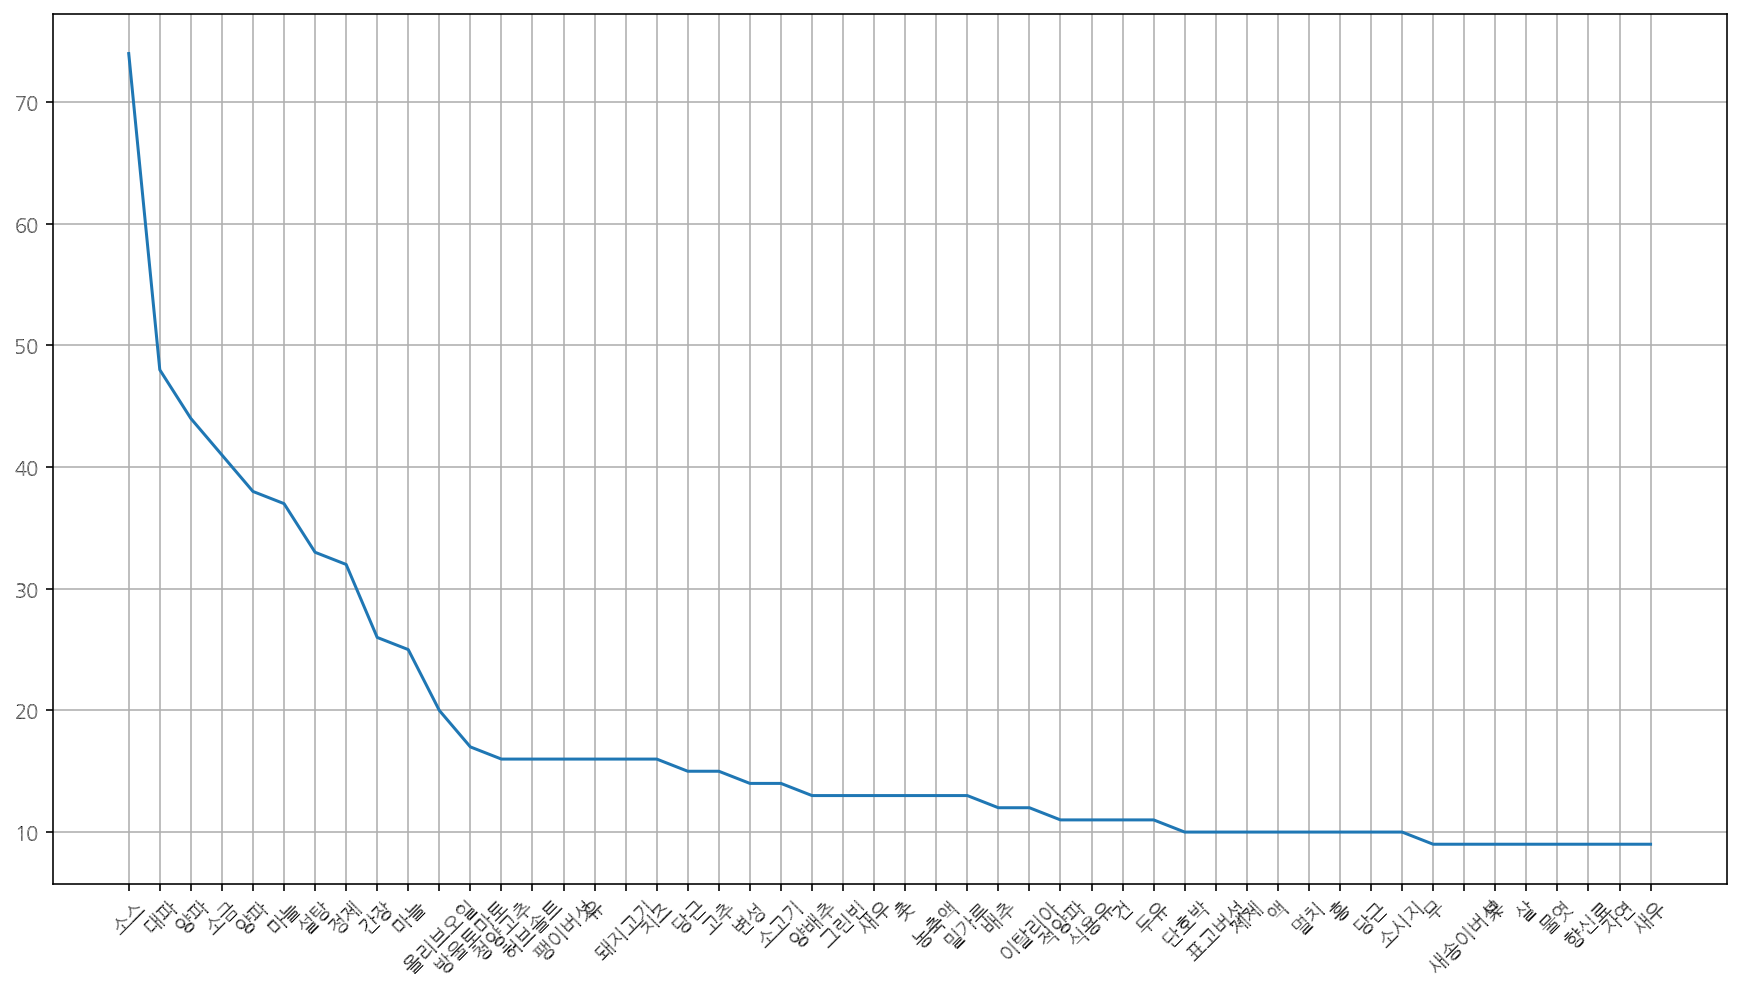

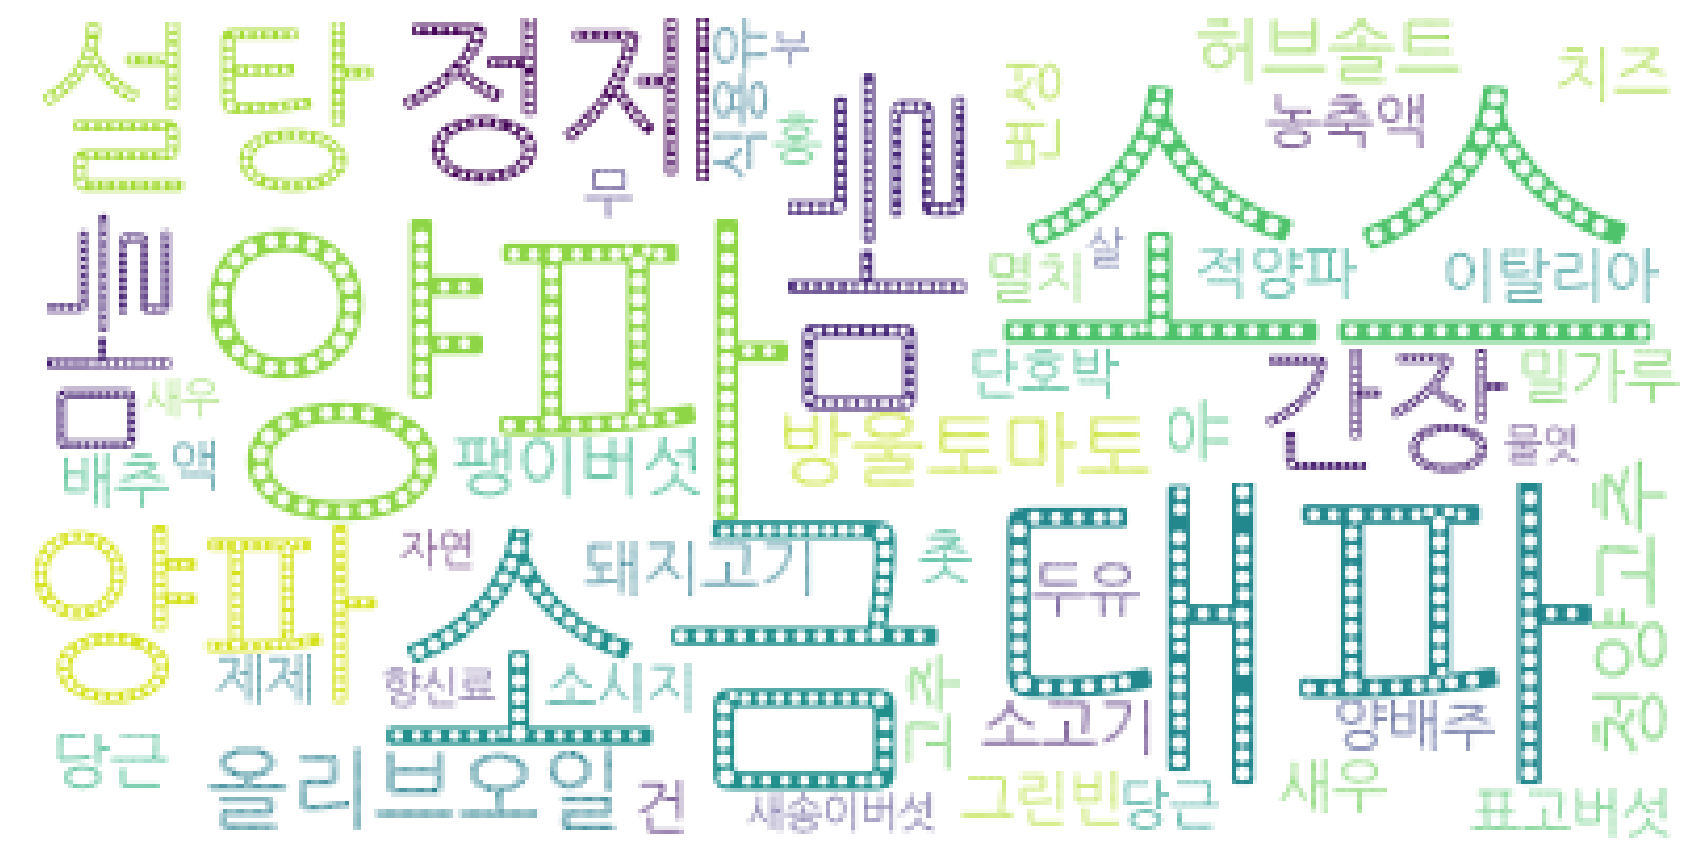

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
# 피코크
from collections import Counter
item_fresh = item[item.company == '피코크'].dropna()
ls = ''.join(item_fresh.ingredients.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

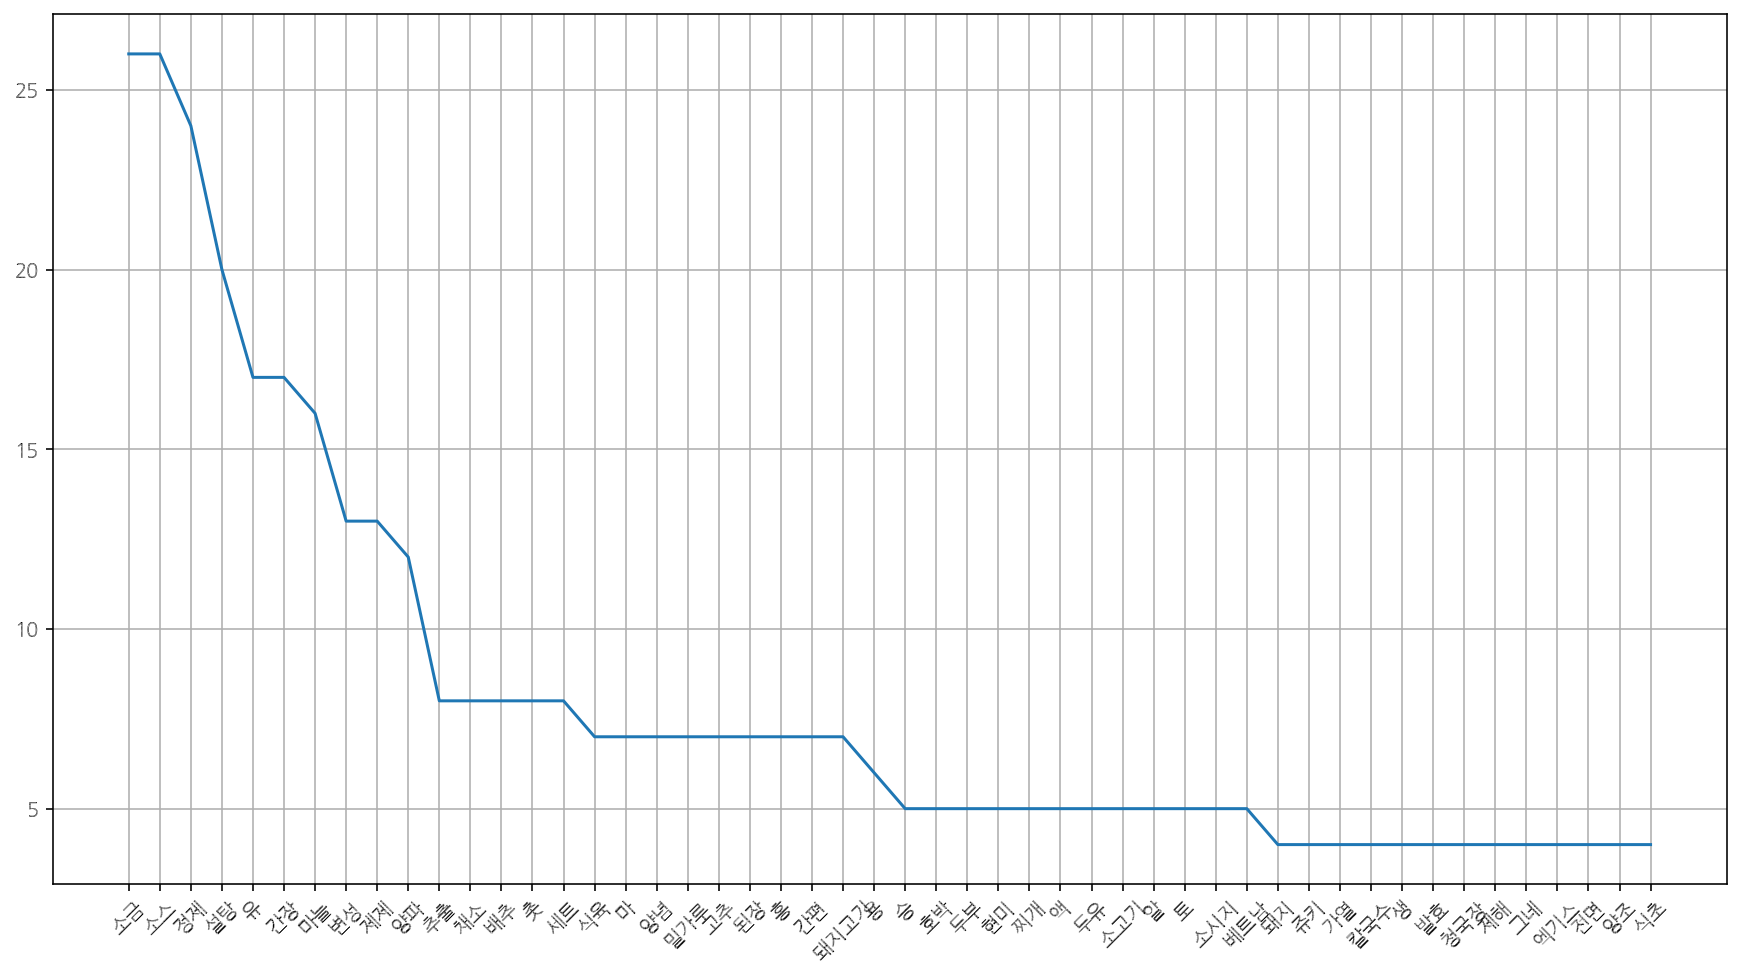

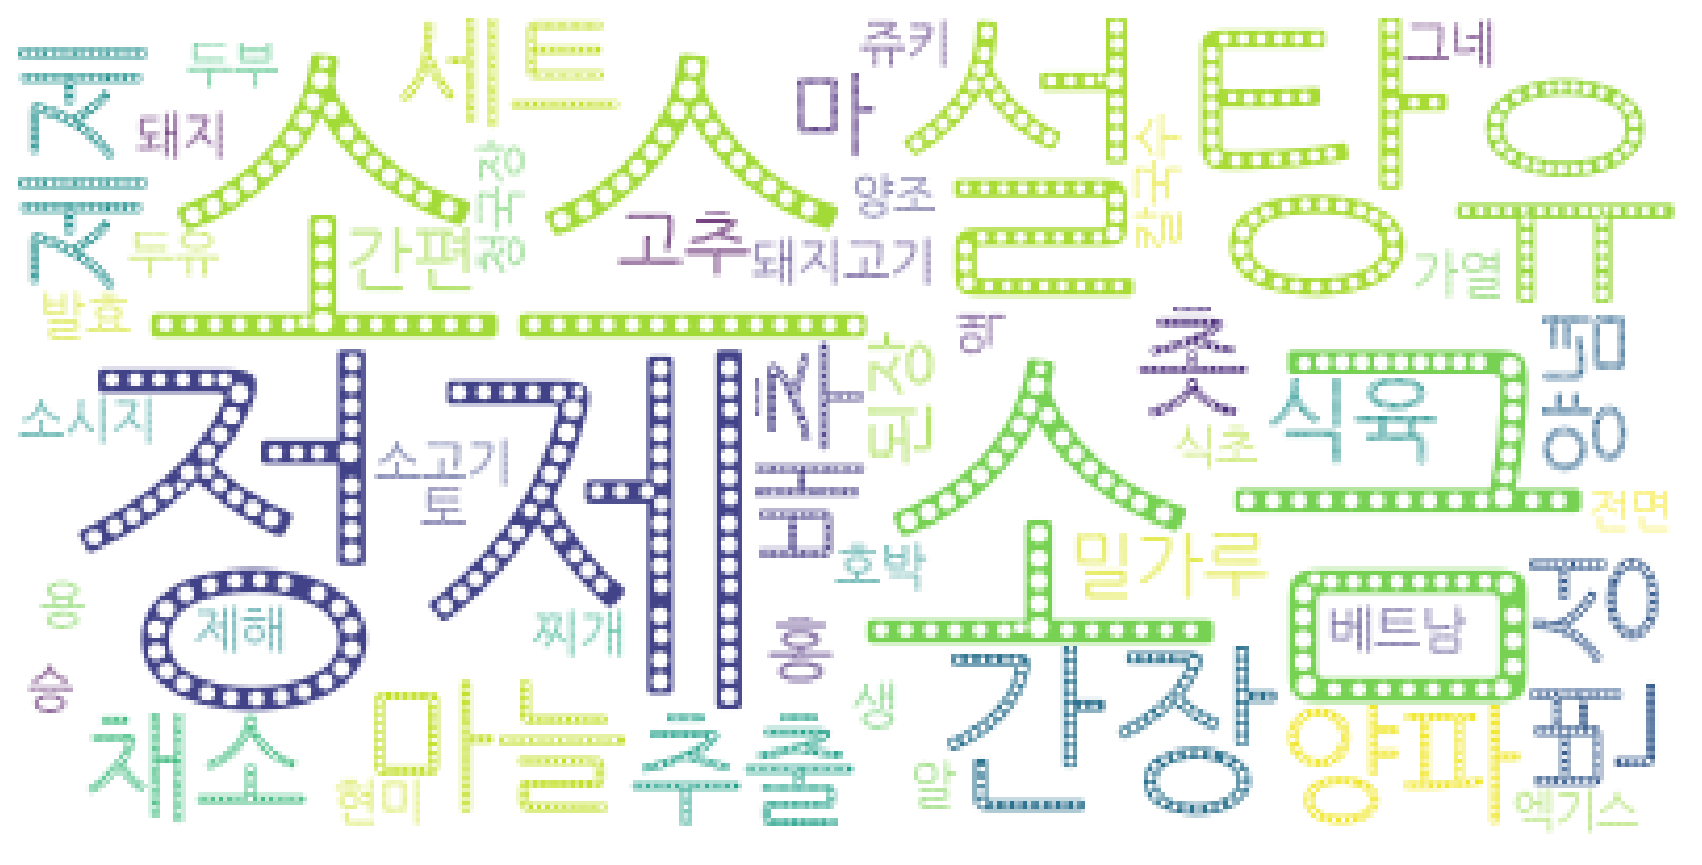

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [21]:
# 쿡킷
ls = []
import re
for i in cookit['ingre_image']:
  data = i.replace('팩', '')
  data = re.sub('[\d\.]', '', data)
  ls.append(data)

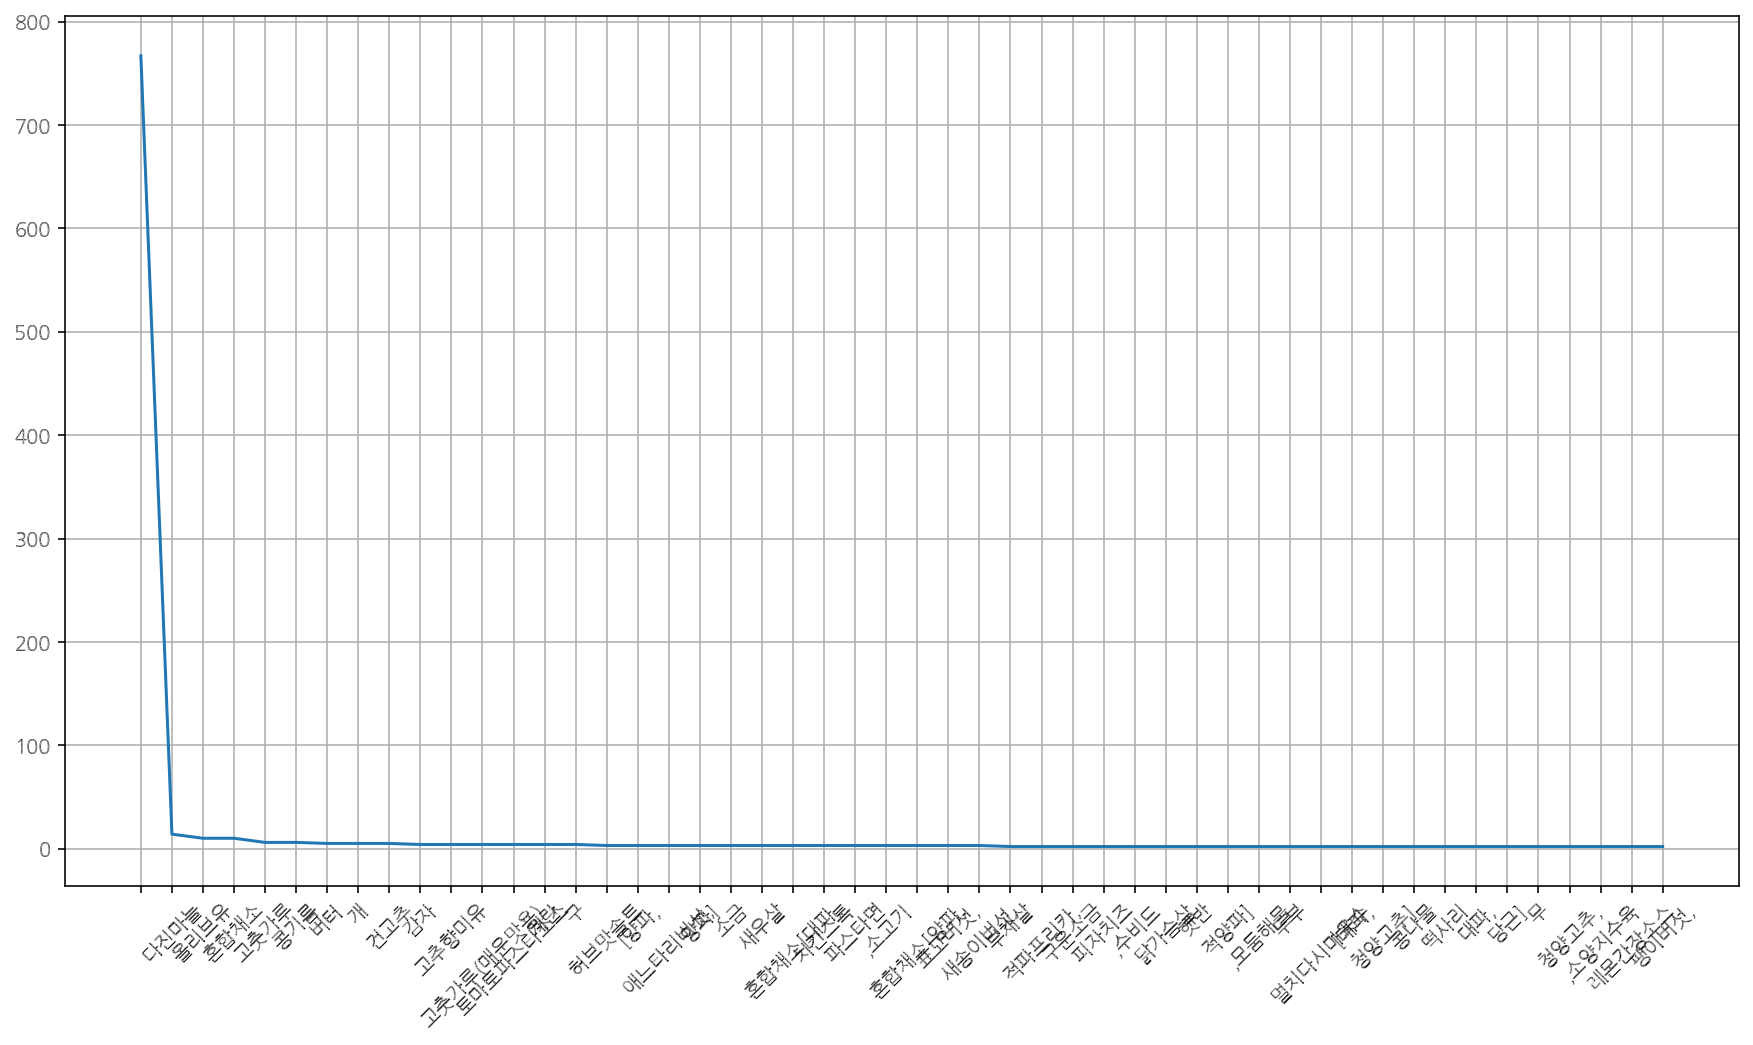

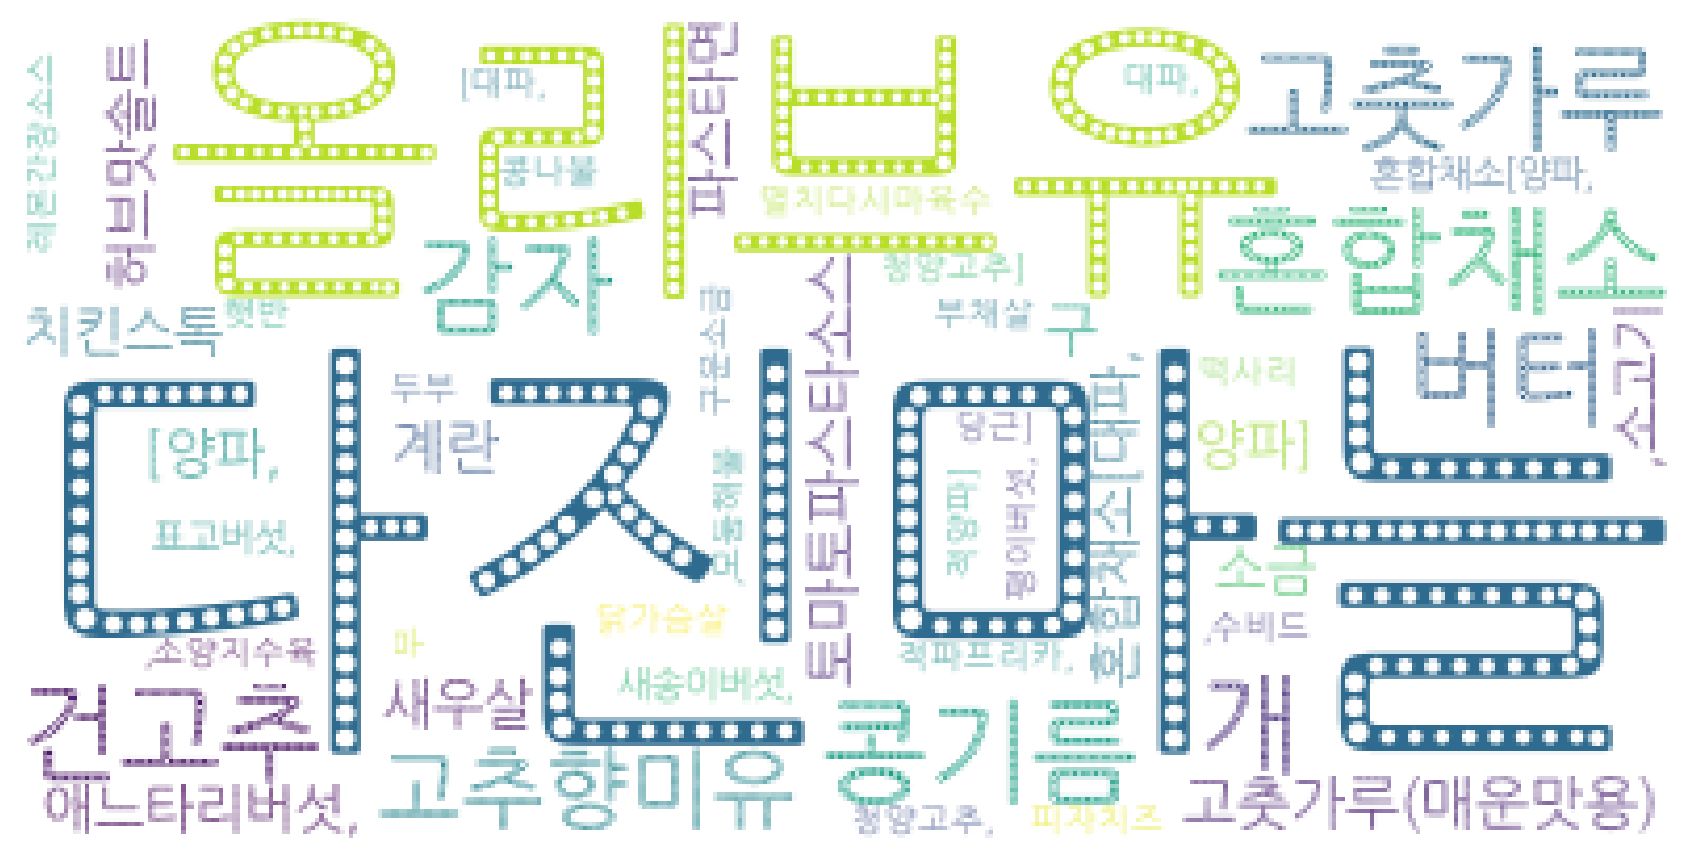

In [22]:
ls = ','.join(ls).split(' ')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 리뷰 비교

In [23]:
# 프레시지
from collections import Counter
item_fresh = df[df.company == '프레시지'].dropna()
ls = ''.join(item_fresh.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

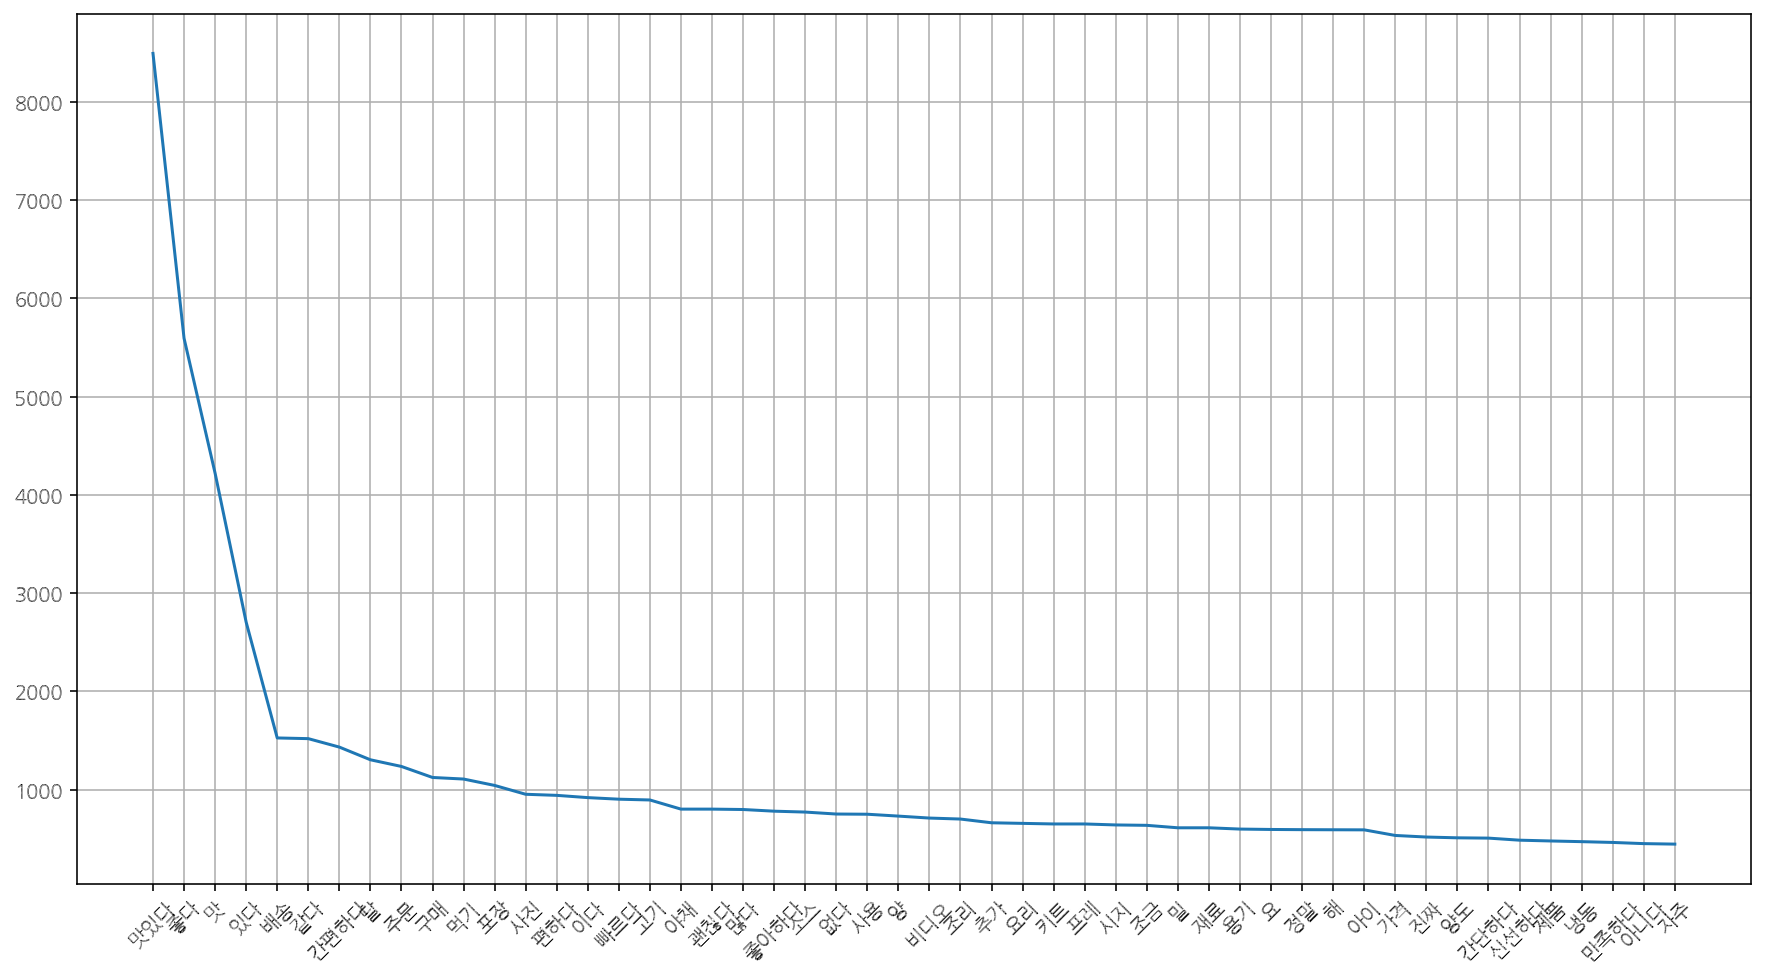

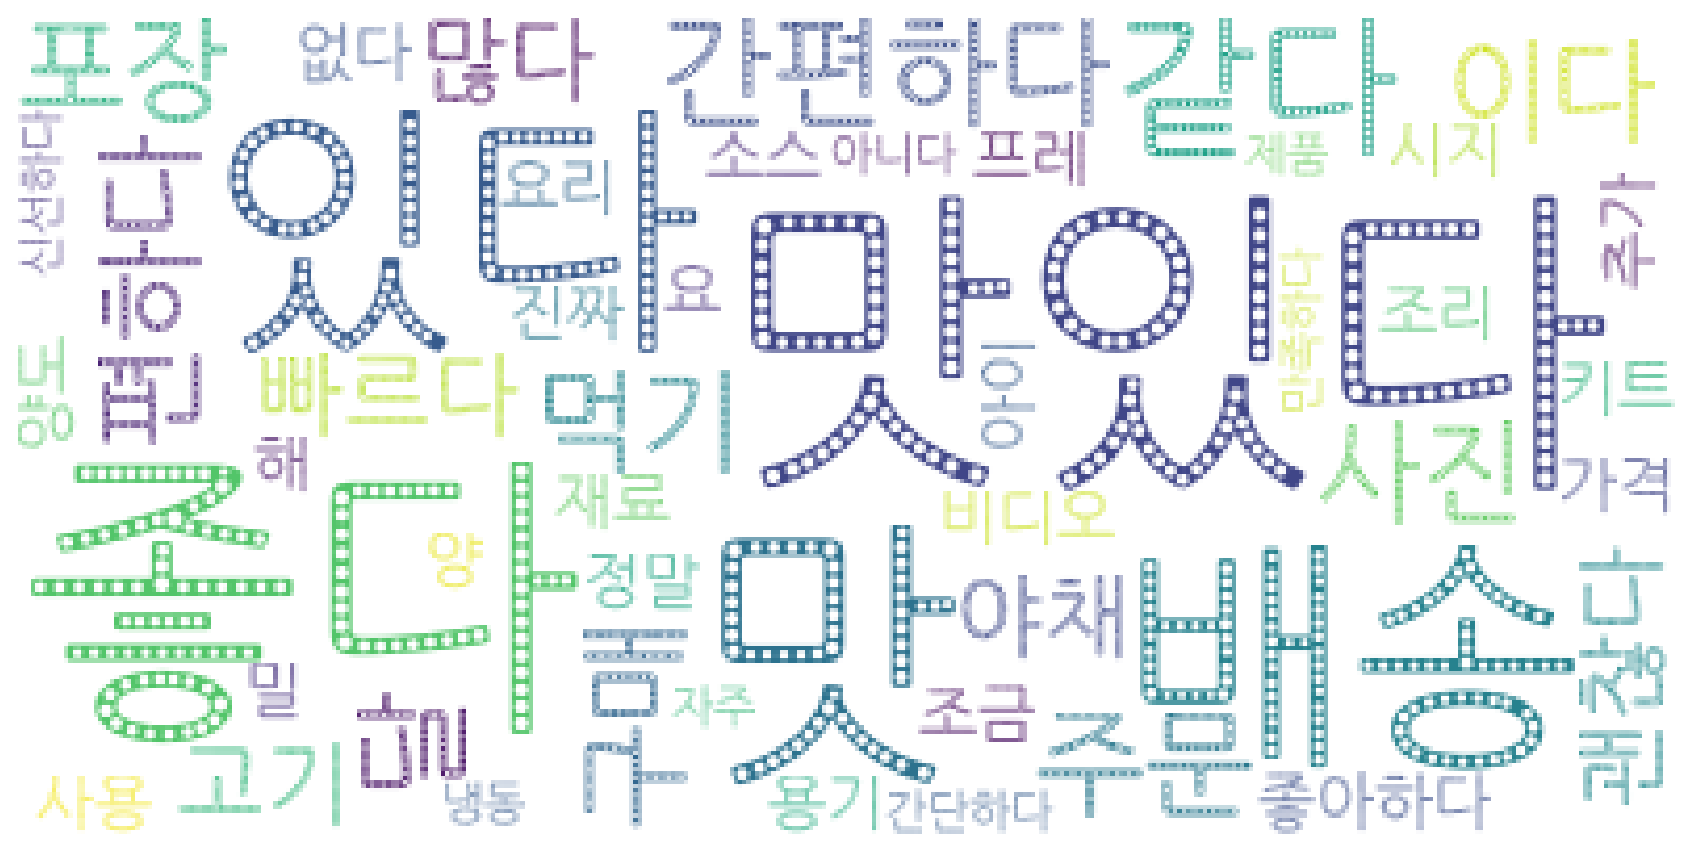

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

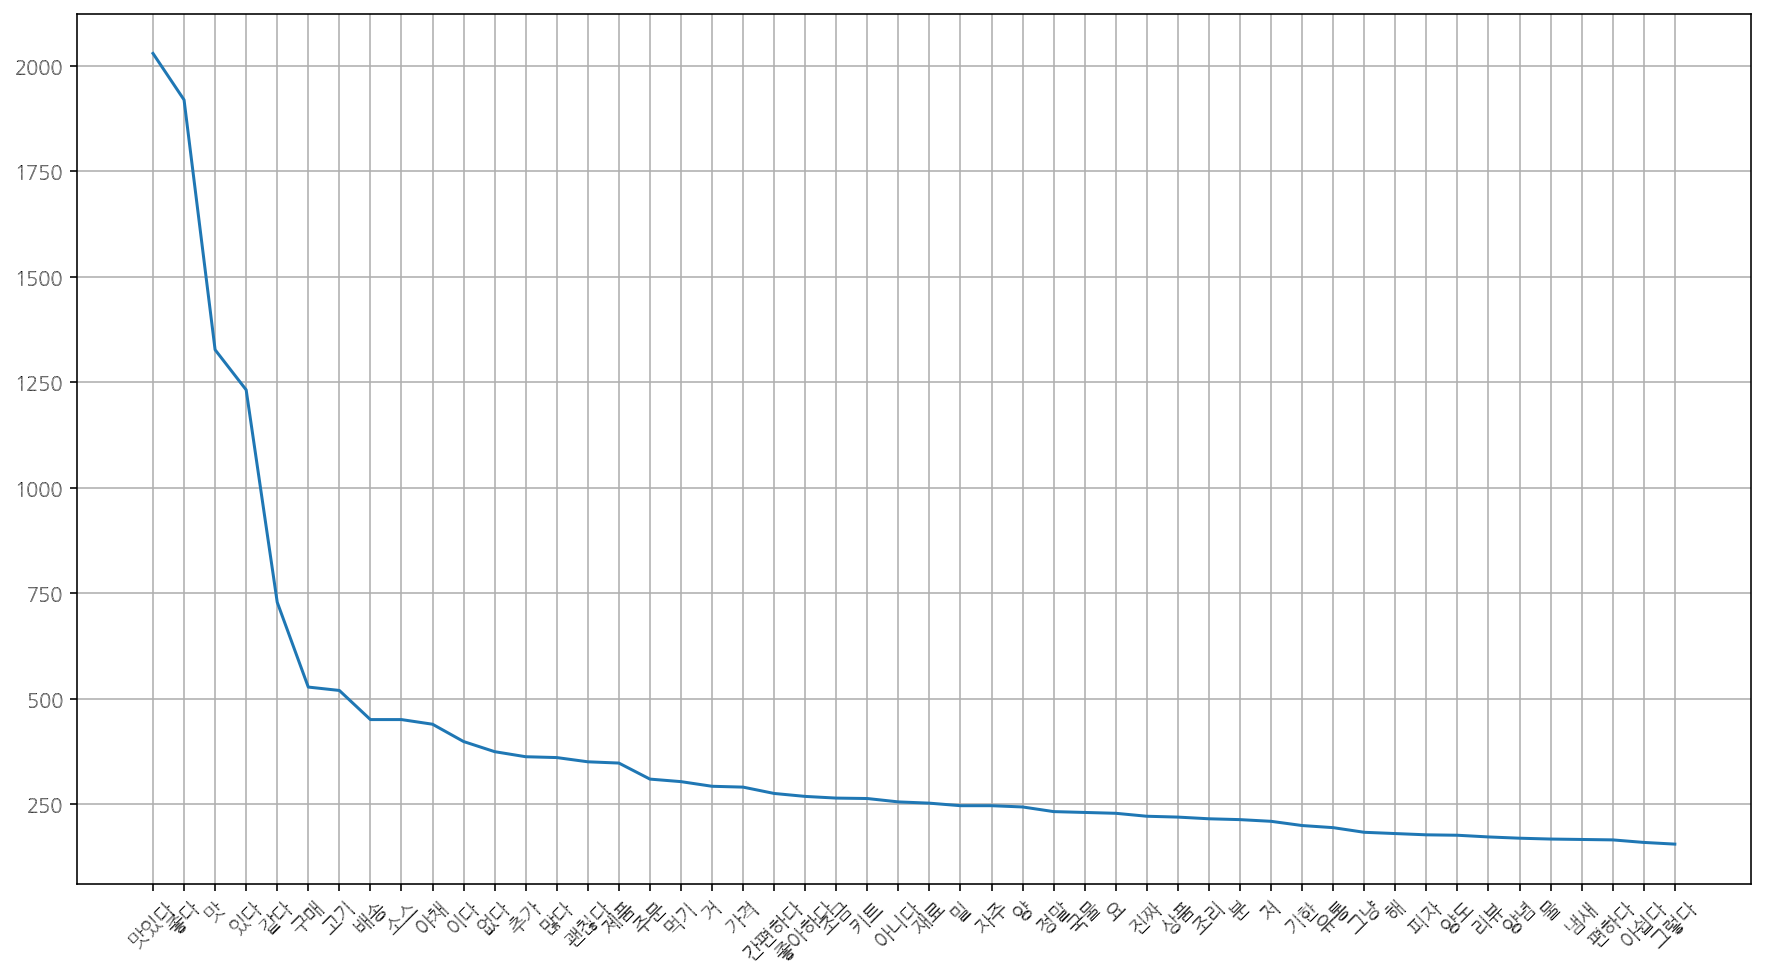

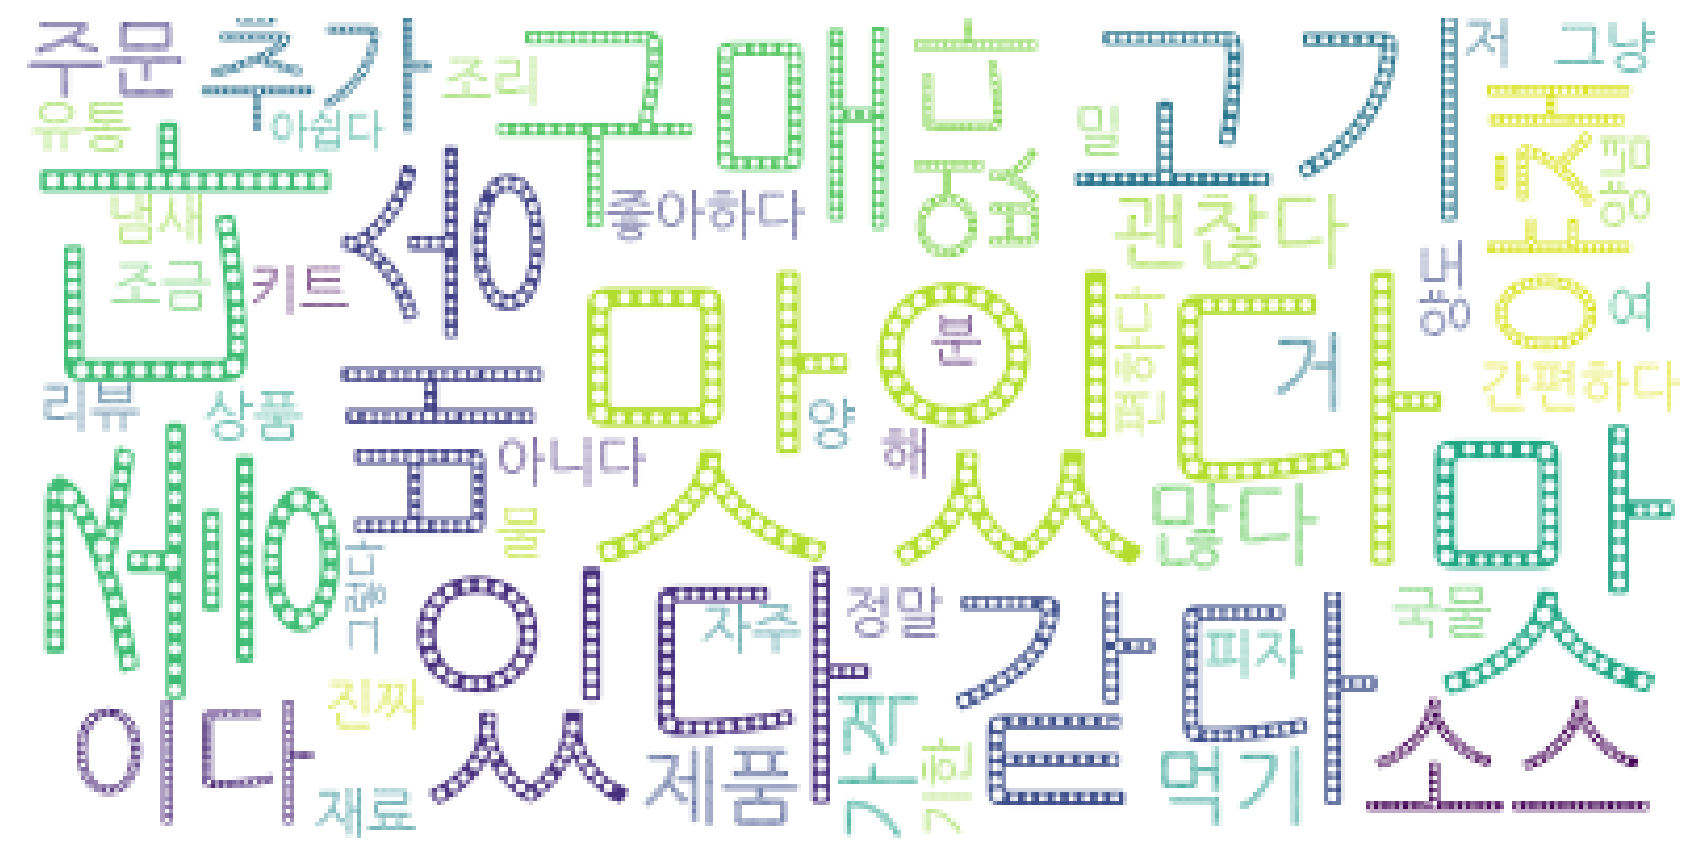

In [25]:
# 피코크
from collections import Counter
item_fresh = df[df.company == '피코크'].dropna()
ls = ''.join(item_fresh.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

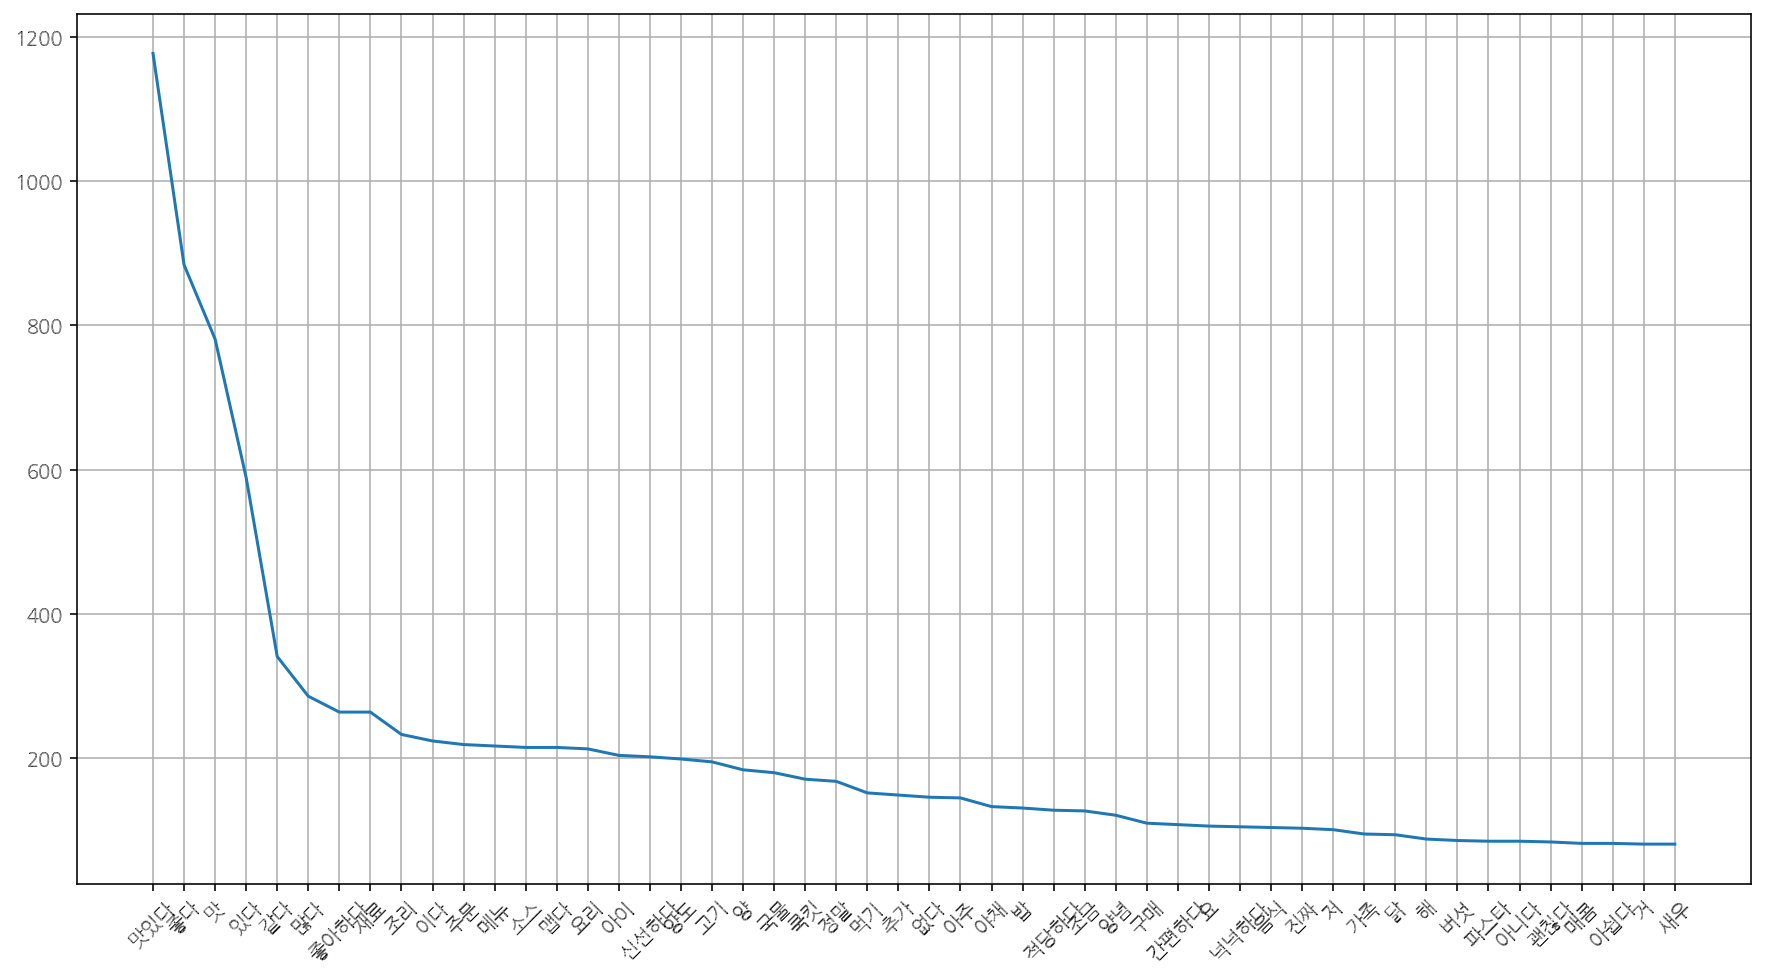

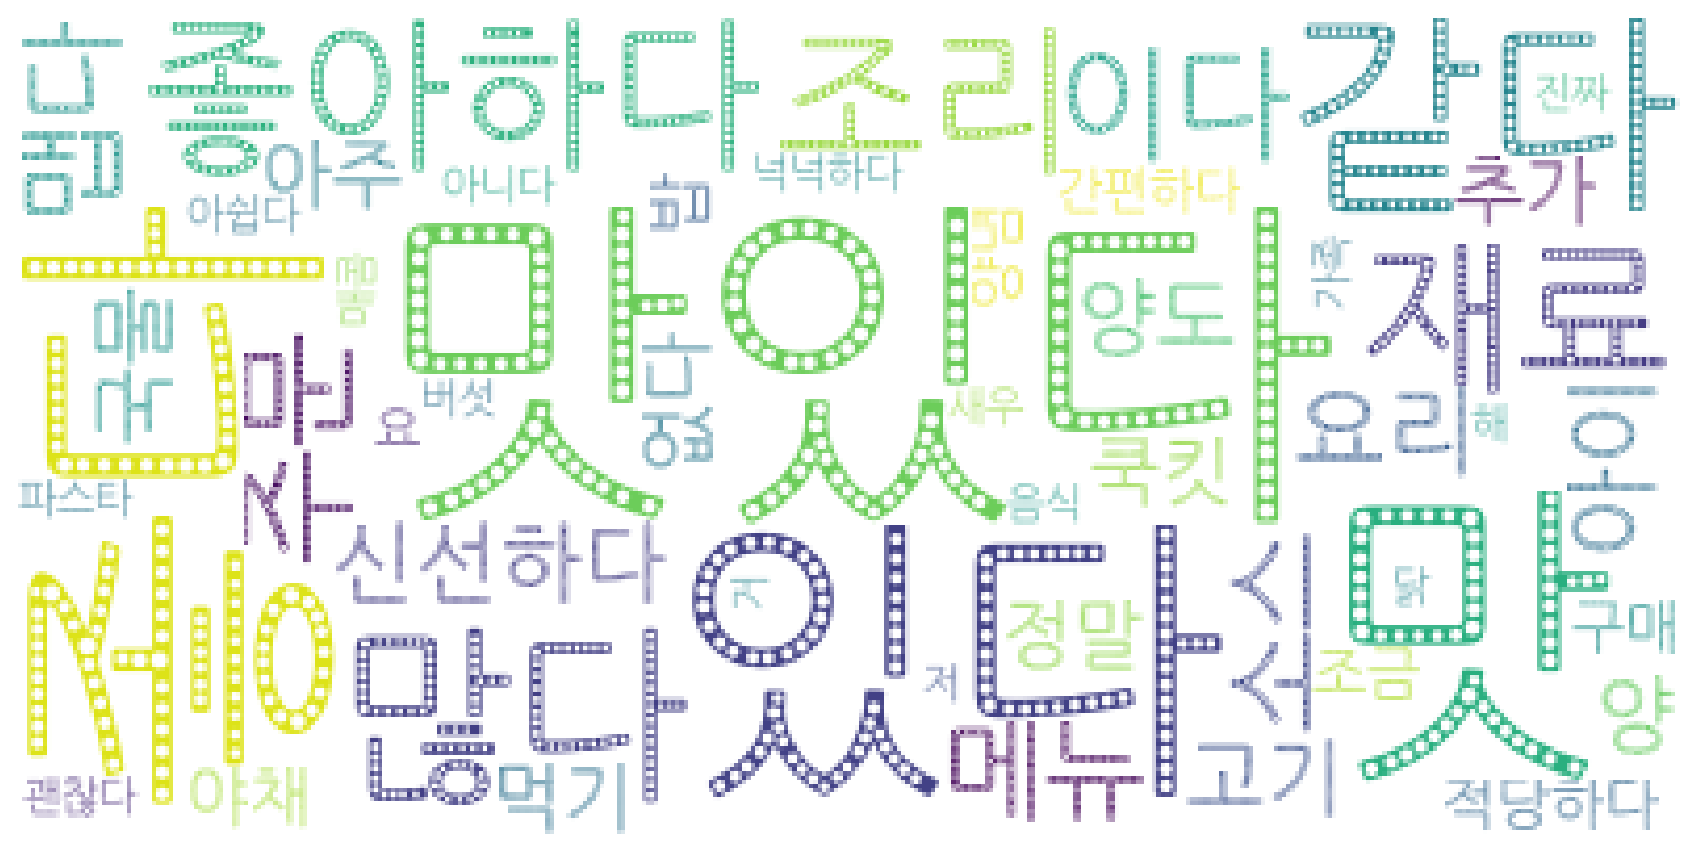

In [26]:
# 쿡킷
from collections import Counter
item_fresh = df[df.company == '쿡킷'].dropna()
ls = ''.join(item_fresh.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 개별 리뷰 확인

In [112]:
new_review = pd.concat([review[['company', 'title', 'rates', 'reviews', 'data']], fresh[['company', 'title', 'rates', 'reviews', 'data']]])
drop_index1 = new_review[new_review.rates == '[]'].index
new_review.drop(drop_index1, axis=0, inplace=True)
drop_index2 = new_review[new_review.rates == '0'].index
new_review.drop(drop_index2, axis=0, inplace=True)
new_review.reset_index(drop=True, inplace=True)

In [130]:
df = pd.DataFrame(columns = ['company', 'data', 'title', 'rates', 'reviews'])
for i in range(len(new_review)):
  try:
    tmp = pd.DataFrame({'company':new_review.company[i], 'data':new_review.data[i], 'title':new_review.title[i], 'rates':eval(''.join(new_review.rates[i])), 'reviews':eval(''.join(new_review.reviews[i]))})
    df = pd.concat([df, tmp], axis=0)
  except:
    pass

In [131]:
df.reset_index(drop=True, inplace=True)
df = df[(df['rates'] == '1')|(df['rates'] == '2')|(df['rates'] == '3')|(df['rates'] == '4')|(df['rates'] == '5')]
df.rates = df.rates.apply(int)
df[df.rates<=3]

,company,data,title,rates,reviews
0,프레시지,naver,2마리가 들어간 시래기 고등어조림,3,집에서 점점 생선요리 안해먹게 되는 것 같아요. 그런면에서 편리하고 한번 먹을 만큼...
20,프레시지,naver,2마리가 들어간 시래기 고등어조림,3,양념은 제 입맛에 맞아 좋았어요다만 고등어가 조림용으론 너무 얇고 작아 먹을게 별...
24,프레시지,naver,2마리가 들어간 시래기 고등어조림,3,날씨가 더워서 그런지 살짝 녹은상태였어요 뼈가 완전히 발려져 있는게 아니라서 뼈는 ...
31,프레시지,naver,2마리가 들어간 시래기 고등어조림,3,냉동식품인데.... 30도가넘는 이날씨에 물얼음팩 몇개 덜렁 위에얹어놓고 멀쩡히가기...
44,프레시지,naver,2마리가 들어간 시래기 고등어조림,3,일단 고등어가 별로 싱싱하지 았어요가장자리부분이 노랗게 쩔어 있었고 쩐내와 비린내가...
...,...,...,...,...,...
49281,프레시지,fresheasy,구수한 버섯 된장찌개,1,
49282,프레시지,fresheasy,구수한 버섯 된장찌개,1,너무 맛있게잘먹었어요 다음에또배달시켜먹을꺼예요 빠른배송 맛있는 저녁한끼 배부르게잘먹...
49283,프레시지,fresheasy,구수한 버섯 된장찌개,1,물 조절을 잘하셔야되고 팽이버섯은 잘게 찟어 넣어 끓이면 좋아요 양이 좀 작은거 같...
49284,프레시지,fresheasy,구수한 버섯 된장찌개,1,괜탆았어요 근데한번으류 족함 굿굿굿굿괜탆았어요 근데한번으류 족함 굿굿굿굿괜탆았어요 ...


In [136]:
rates_5 = return_review(df[df.rates == 5])
rates_4 = return_review(df[df.rates == 4])
rates_3 = return_review(df[df.rates <= 3])

In [146]:
rates_1 = return_review(df[df.rates == 1])

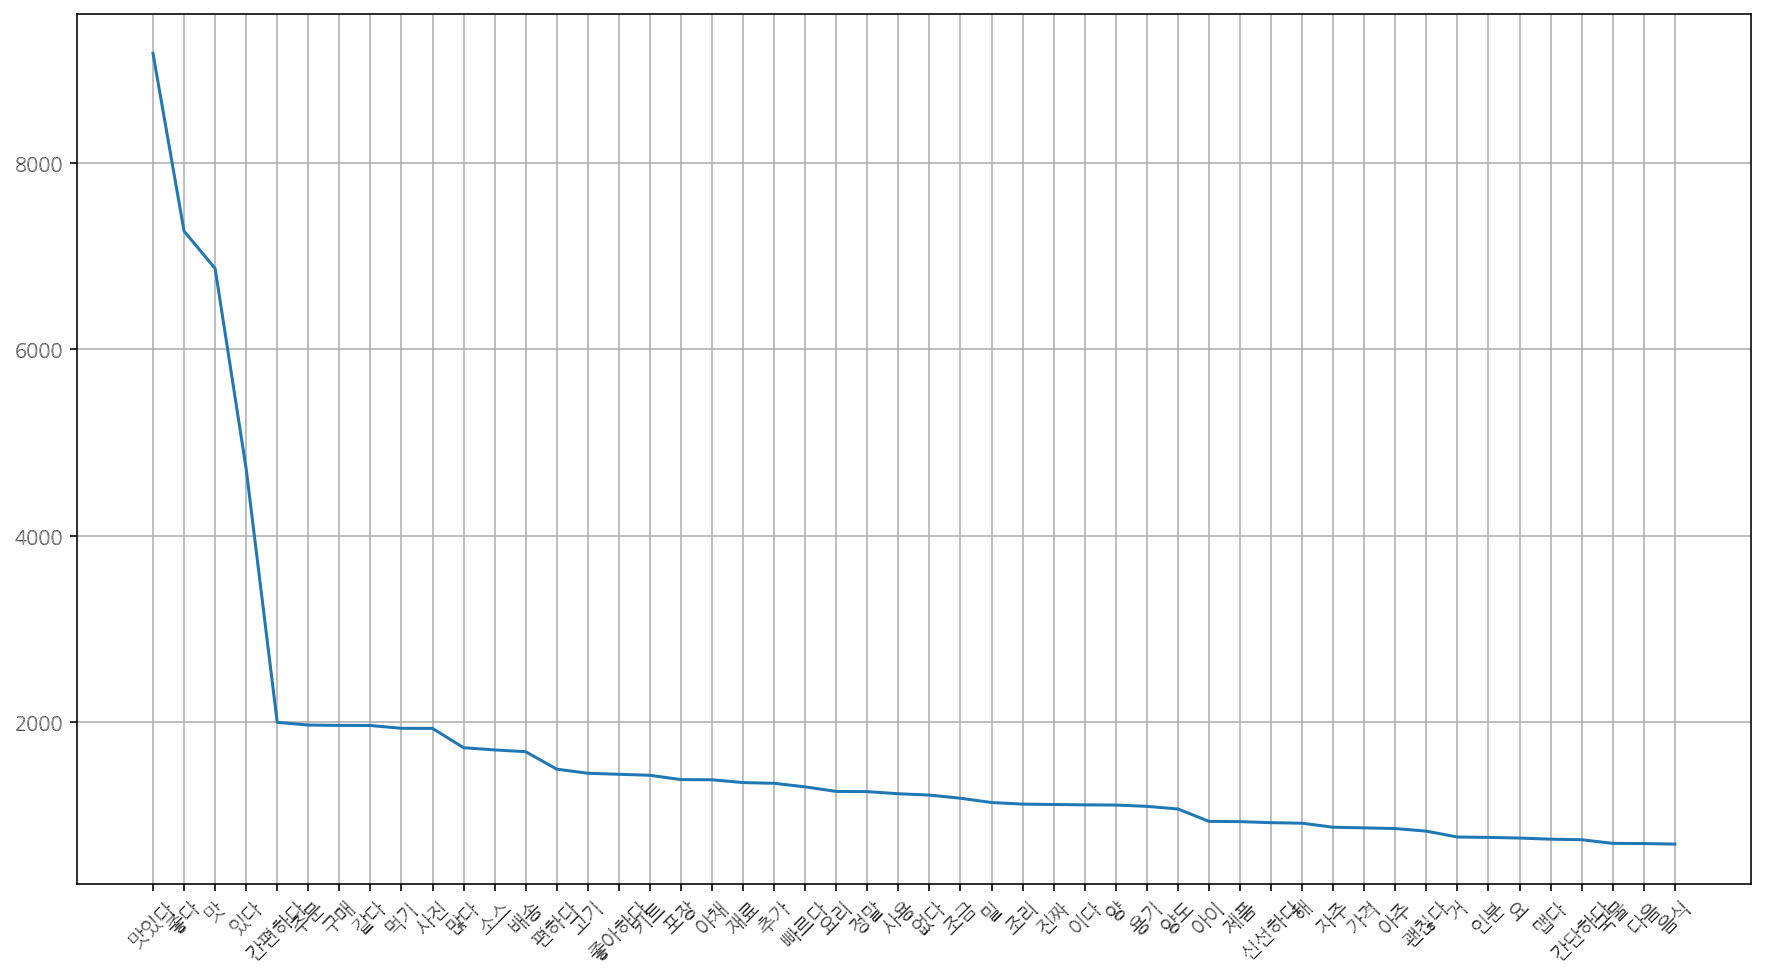

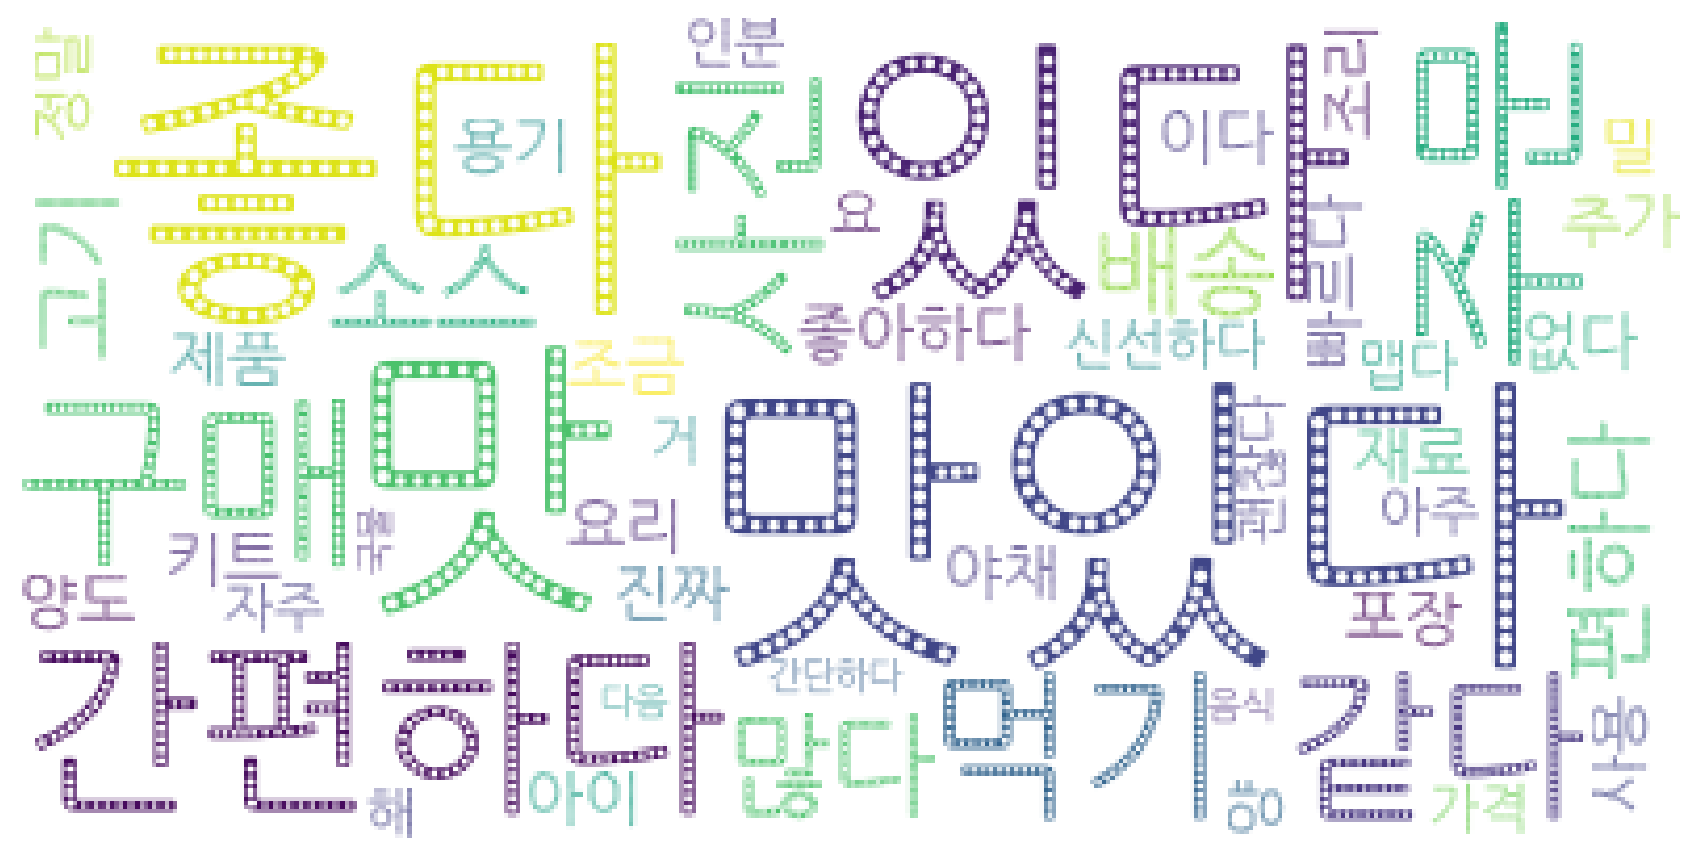

In [144]:
# 개별리뷰 5점대
from collections import Counter
ls = ''.join(rates_5.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

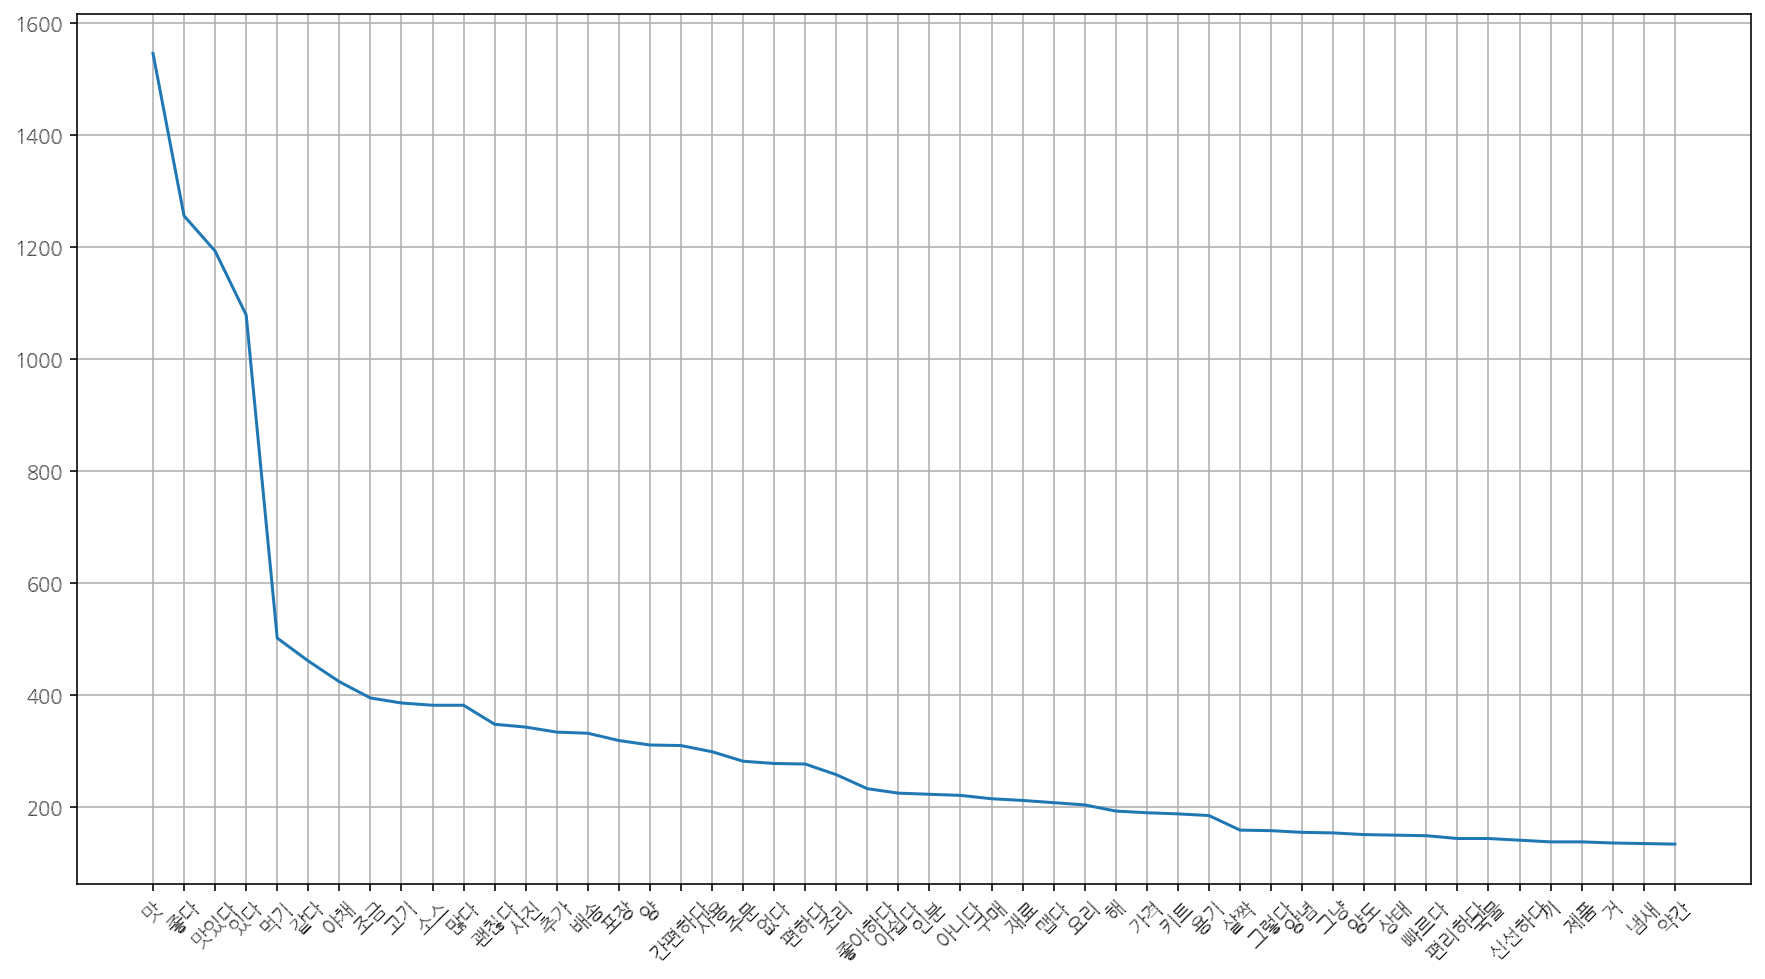

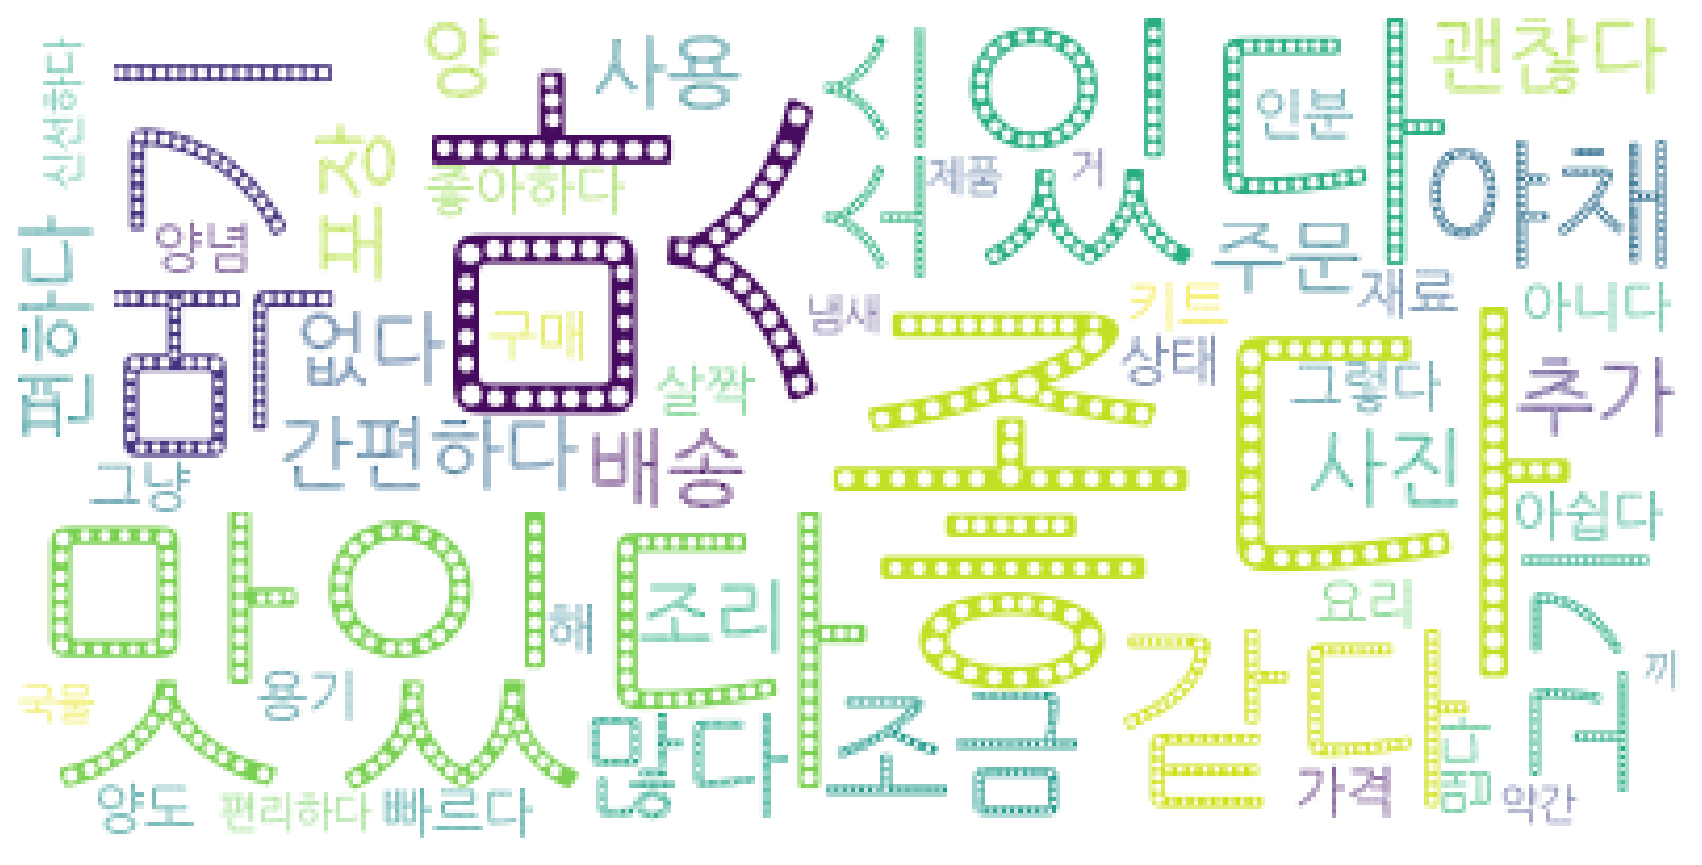

In [138]:
# 개별리뷰 4점대
from collections import Counter
ls = ''.join(rates_4.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

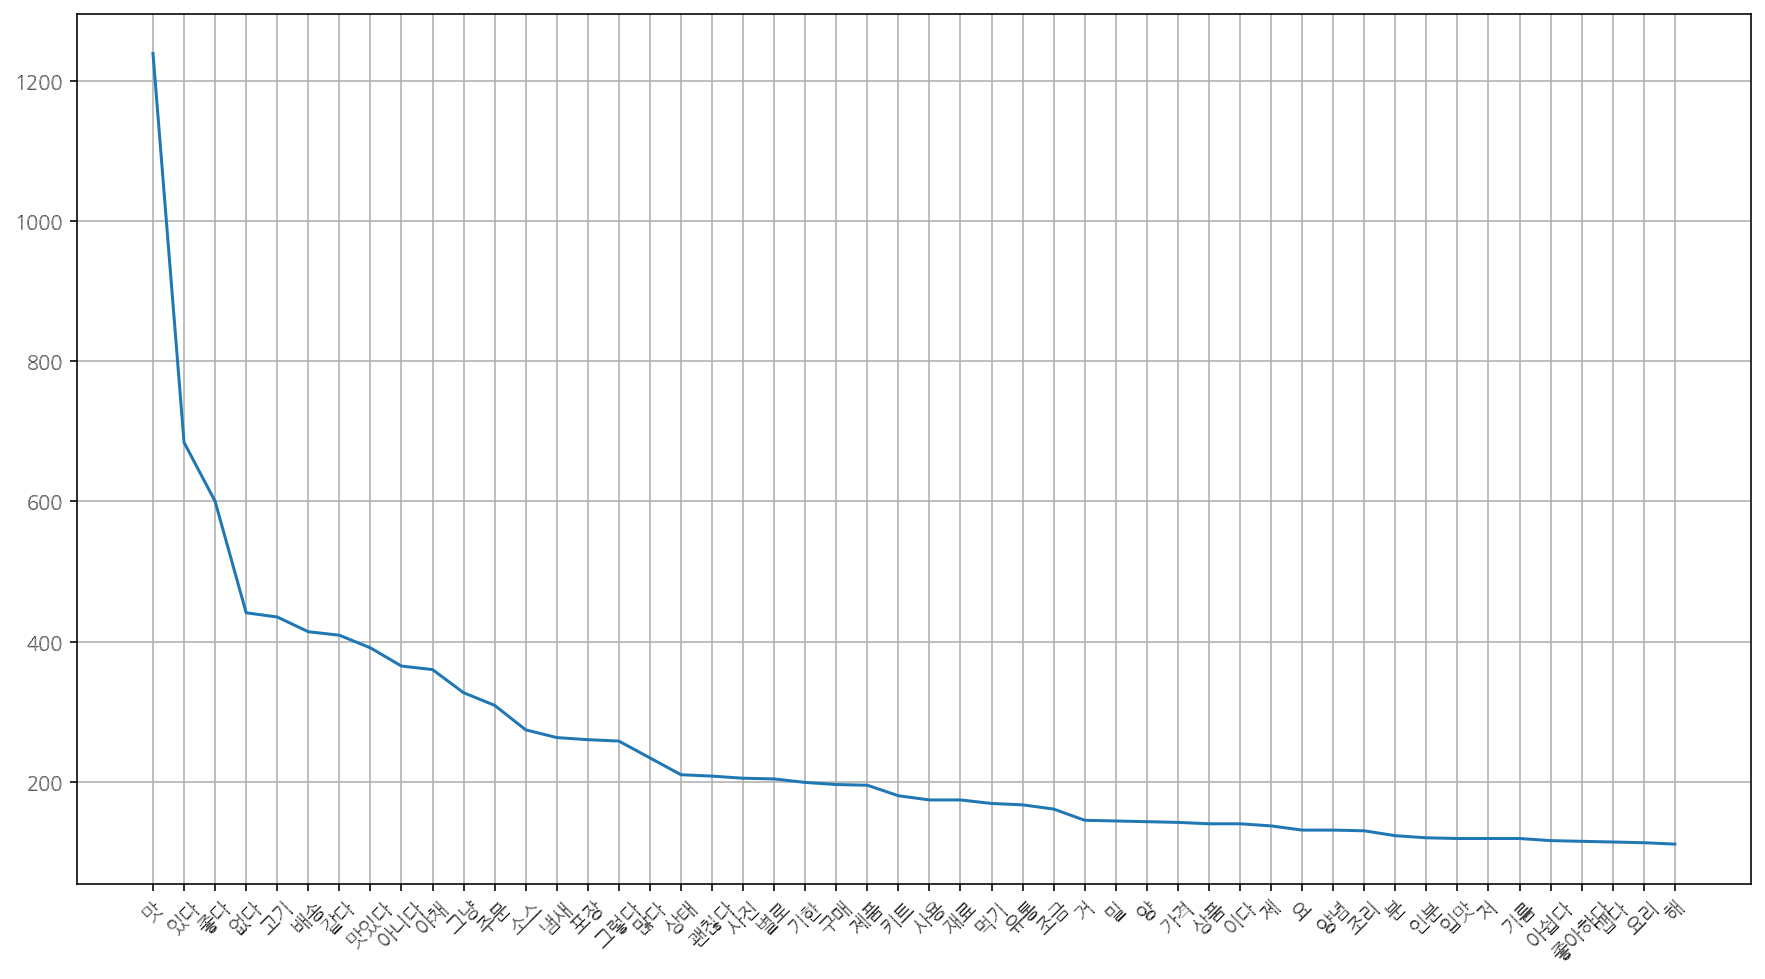

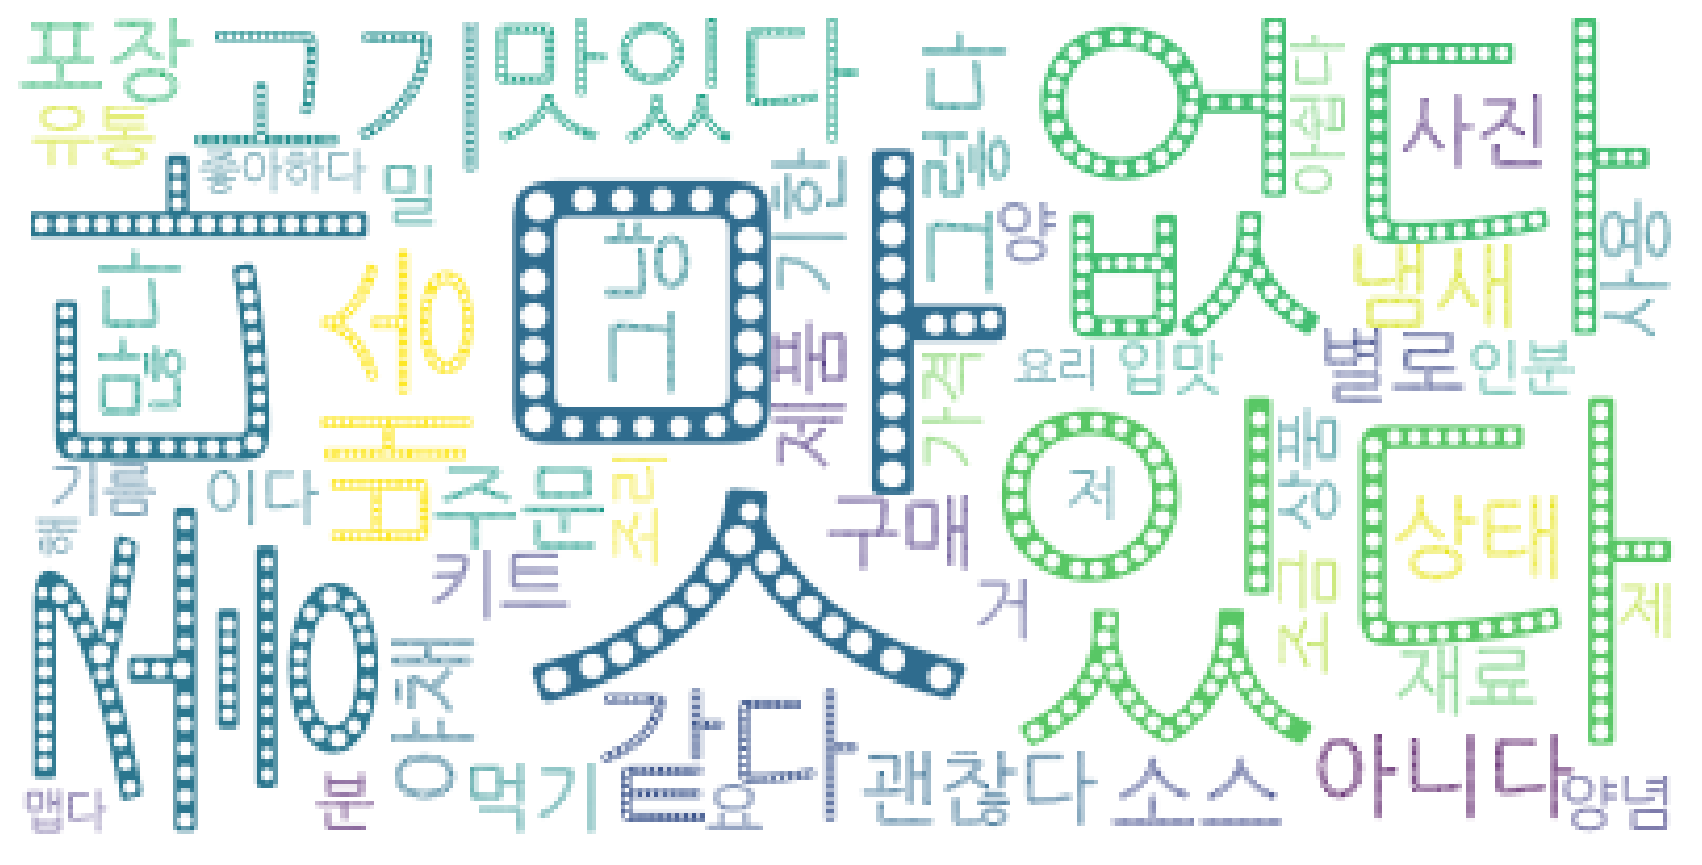

In [139]:
# 개별리뷰 3점 이하
from collections import Counter
ls = ''.join(rates_3.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

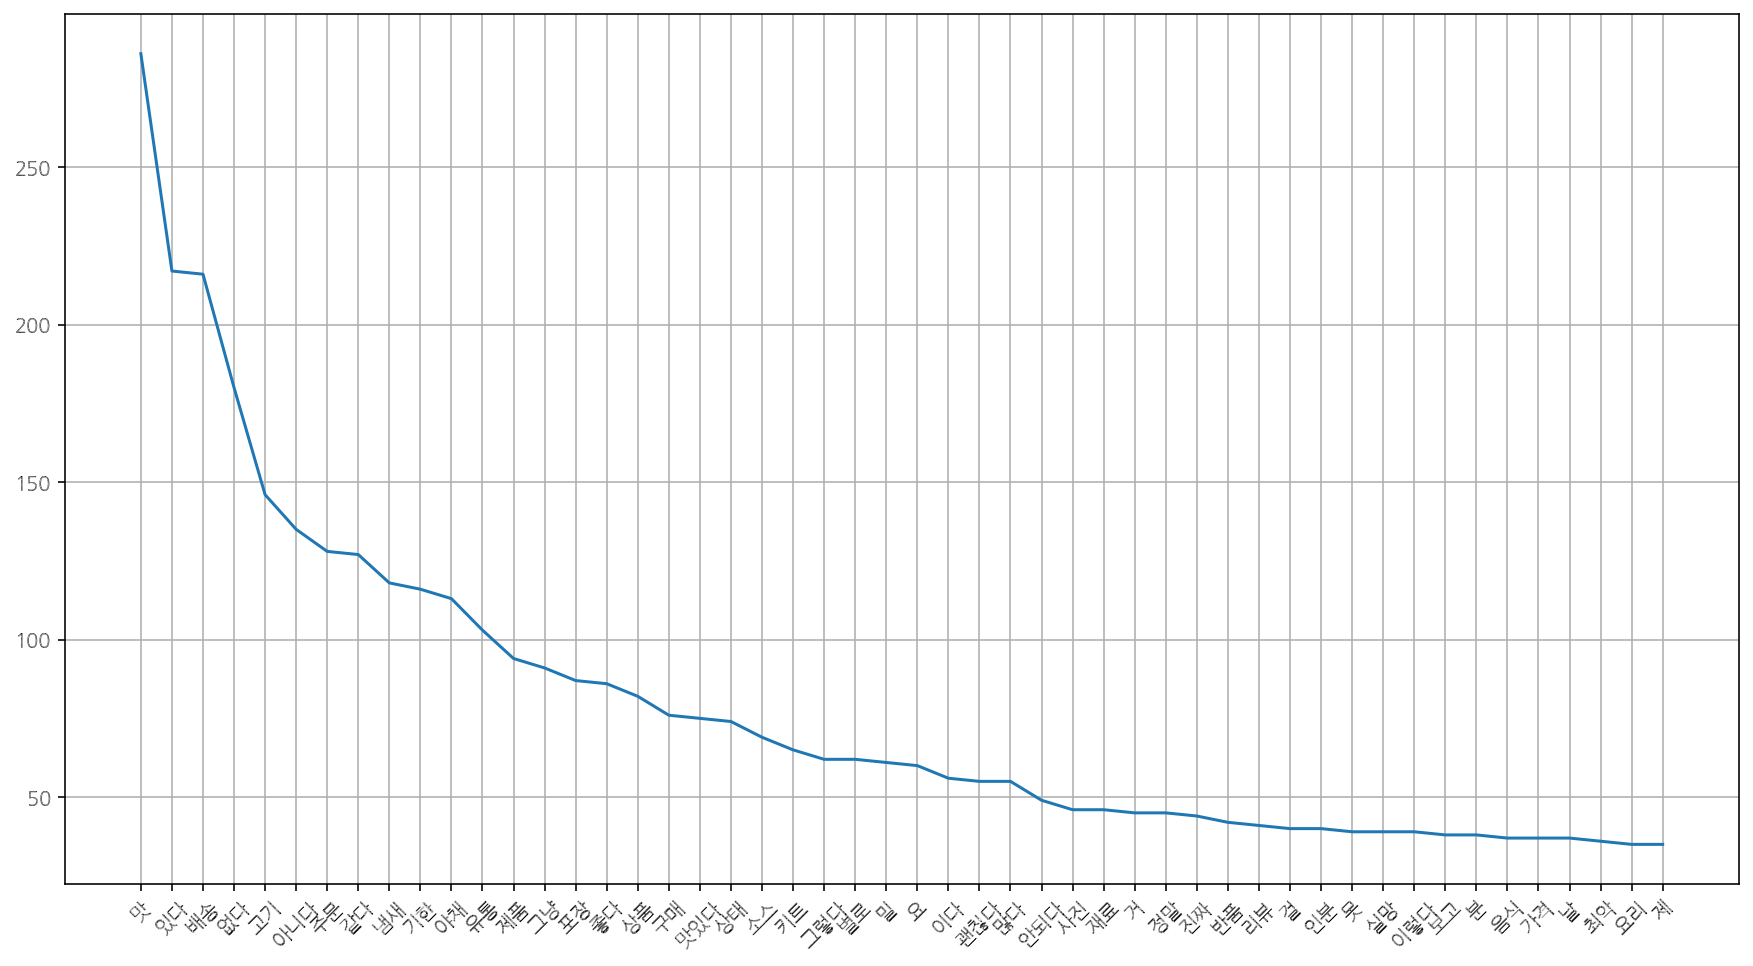

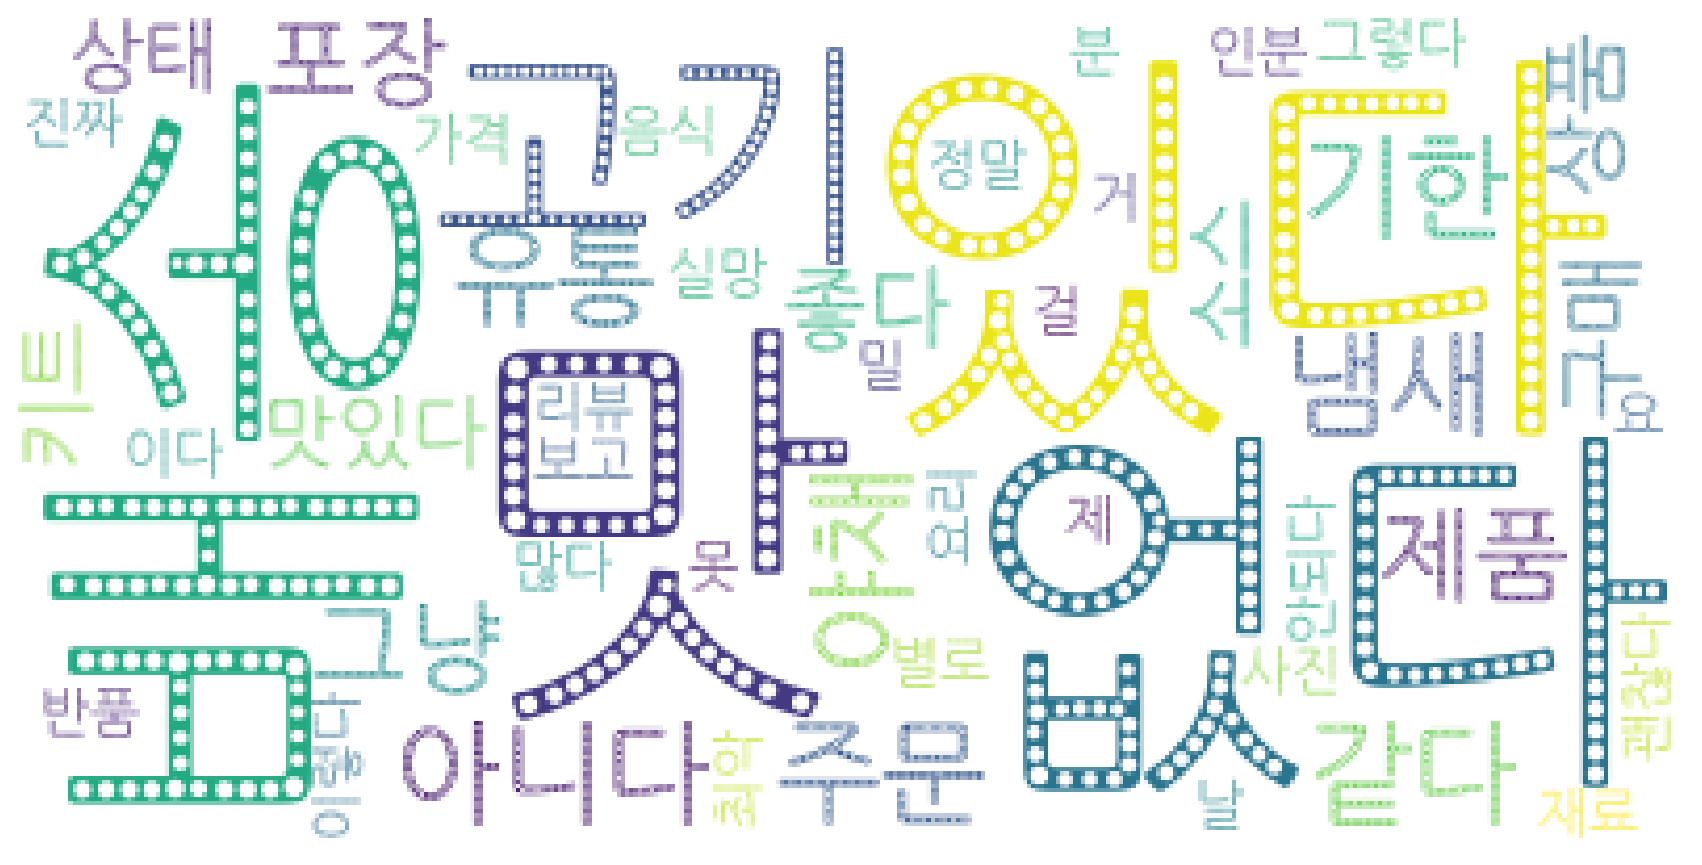

In [147]:
# 개별리뷰 1점
from collections import Counter
ls = ''.join(rates_1.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 45)
plt.grid()

from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis('off')
plt.show()